In [1]:
# om gann ganpataye namah

### Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

### Just Seeing Data

In [16]:
df = pd.read_csv('data/clean-no-noise/train_FD001.csv')
print(df.describe())
df.head(20)

            unit_id          time  op_setting_1  op_setting_2  op_setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000       20631.0   
mean      51.506568    108.807862     -0.000009      0.000002         100.0   
std       29.227633     68.880990      0.002187      0.000293           0.0   
min        1.000000      1.000000     -0.008700     -0.000600         100.0   
25%       26.000000     52.000000     -0.001500     -0.000200         100.0   
50%       52.000000    104.000000      0.000000      0.000000         100.0   
75%       77.000000    156.000000      0.001500      0.000300         100.0   
max      100.000000    362.000000      0.008700      0.000600         100.0   

           sensor_2      sensor_3      sensor_4      sensor_7      sensor_8  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean     642.680934   1590.523119   1408.933782    553.367711   2388.096652   
std        0.500053      6.131150      9.000605    

unit_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_2  \
0         1     1       -0.0007       -0.0004         100.0    641.82   
1         1     2        0.0019       -0.0003         100.0    642.15   
2         1     3       -0.0043        0.0003         100.0    642.35   
3         1     4        0.0007        0.0000         100.0    642.35   
4         1     5       -0.0019       -0.0002         100.0    642.37   
5         1     6       -0.0043       -0.0001         100.0    642.10   
6         1     7        0.0010        0.0001         100.0    642.48   
7         1     8       -0.0034        0.0003         100.0    642.56   
8         1     9        0.0008        0.0001         100.0    642.12   
9         1    10       -0.0033        0.0001         100.0    641.71   
10        1    11        0.0018       -0.0003         100.0    642.28   
11        1    12        0.0016        0.0002         100.0    642.06   
12        1    13       -0.0019        0.0004         100.0    643.07   
13        1    14        0.0009       -0.0000         100.0    642.35   
14        1    15       -0.0018       -0.0003         100.0    642.43   
15        1    16        0.0006        0.0005         100.0    642.13   
16        1    17        0.0002        0.0002         100.0    642.58   
17        1    18       -0.0031       -0.0001         100.0    642.62   
18        1    19        0.0032       -0.0003         100.0    641.79   
19        1    20       -0.0037        0.0001         100.0    643.04   

    sensor_3  sensor_4  sensor_7  sensor_8  sensor_9  sensor_11  sensor_12  \
0    1589.70   1400.60    554.36   2388.06   9046.19      47.47     521.66   
1    1591.82   1403.14    553.75   2388.04   9044.07      47.49     522.28   
2    1587.99   1404.20    554.26   2388.08   9052.94      47.27     522.42   
3    1582.79   1401.87    554.45   2388.11   9049.48      47.13     522.86   
4    1582.85   1406.22    554.00   2388.06   9055.15      47.28     522.19   
5    1584.47   1398.37    554.67   2388.02   9049.68      47.16     521.68   
6    1592.32   1397.77    554.34   2388.02   9059.13      47.36     522.32   
7    1582.96   1400.97    553.85   2388.00   9040.80      47.24     522.47   
8    1590.98   1394.80    553.69   2388.05   9046.46      47.29     521.79   
9    1591.24   1400.46    553.59   2388.05   9051.70      47.03     521.79   
10   1581.75   1400.64    554.54   2388.05   9049.61      47.15     521.40   
11   1583.41   1400.15    554.52   2388.09   9049.37      47.18     521.80   
12   1582.19   1400.83    553.44   2388.12   9046.82      47.38     521.85   
13   1592.95   1399.16    554.48   2388.09   9047.37      47.44     521.67   
14   1583.82   1402.13    553.64   2388.11   9052.22      47.30     522.50   
15   1587.98   1404.50    553.94   2388.05   9049.34      47.24     521.49   
16   1584.96   1399.95    553.80   2388.06   9054.92      47.12     521.89   
17   1591.04   1396.12    554.20   2388.05   9049.55      47.21     521.76   
18   1587.56   1400.35    554.18   2388.04   9053.99      47.40     521.89   
19   1581.11   1405.23    554.81   2388.05   9045.90      47.22     522.07   

    sensor_13  sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  
0     2388.02    8138.62     8.4195        392      39.06    23.4190  
1     2388.07    8131.49     8.4318        392      39.00    23.4236  
2     2388.03    8133.23     8.4178        390      38.95    23.3442  
3     2388.08    8133.83     8.3682        392      38.88    23.3739  
4     2388.04    8133.80     8.4294        393      38.90    23.4044  
5     2388.03    8132.85     8.4108        391      38.98    23.3669  
6     2388.03    8132.32     8.3974        392      39.10    23.3774  
7     2388.03    8131.07     8.4076        391      38.97    23.3106  
8     2388.05    8125.69     8.3728        392      39.05    23.4066  
9     2388.06    8129.38     8.4286        393      38.95    23.4694  
10    2388.01    8140.58     8.4340        392    

In [17]:
df = pd.read_csv('data/clean-no-noise/train_FD002.csv')
print(df.describe())

df.head(20)

            unit_id          time  op_setting_1  op_setting_2  op_setting_3  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     131.082981    109.154746     23.998407      0.572056     94.046020   
std       74.463862     69.180569     14.747376      0.310016     14.237735   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       68.000000     52.000000     10.004600      0.250700    100.000000   
50%      131.000000    104.000000     25.001300      0.700000    100.000000   
75%      195.000000    157.000000     41.998000      0.840000    100.000000   
max      260.000000    378.000000     42.008000      0.842000    100.000000   

           sensor_2      sensor_3      sensor_4      sensor_7      sensor_8  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     579.672399   1419.971013   1205.442024    282.606787   2228.879188   
std       37.289399    105.946341    119.123428    

unit_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_2  \
0         1     1       34.9983        0.8400         100.0    555.32   
1         1     2       41.9982        0.8408         100.0    549.90   
2         1     3       24.9988        0.6218          60.0    537.31   
3         1     4       42.0077        0.8416         100.0    549.51   
4         1     5       25.0005        0.6203          60.0    537.07   
5         1     6       25.0045        0.6205          60.0    537.02   
6         1     7       42.0043        0.8409         100.0    549.74   
7         1     8       20.0020        0.7002         100.0    607.44   
8         1     9       41.9995        0.8407         100.0    549.33   
9         1    10       42.0011        0.8400         100.0    549.33   
10        1    11       42.0029        0.8400         100.0    549.81   
11        1    12        0.0015        0.0010         100.0    642.70   
12        1    13       20.0003        0.7000         100.0    607.67   
13        1    14       42.0020        0.8407         100.0    549.47   
14        1    15       10.0038        0.2513         100.0    604.57   
15        1    16       35.0053        0.8419         100.0    555.56   
16        1    17       25.0077        0.6217          60.0    536.25   
17        1    18       34.9996        0.8404         100.0    555.45   
18        1    19       42.0018        0.8400         100.0    549.07   
19        1    20       20.0020        0.7015         100.0    607.90   

    sensor_3  sensor_4  sensor_7  sensor_8  ...  sensor_11  sensor_12  \
0    1358.61   1137.23    194.64   2222.65  ...      42.02     183.06   
1    1353.22   1125.78    138.51   2211.57  ...      42.20     130.42   
2    1256.76   1047.45    175.71   1915.11  ...      36.69     164.22   
3    1354.03   1126.38    138.46   2211.58  ...      41.96     130.72   
4    1257.71   1047.93    175.05   1915.10  ...      36.89     164.31   
5    1266.38   1048.72    175.17   1915.15  ...      36.78     164.27   
6    1347.45   1127.19    138.71   2211.62  ...      42.19     130.49   
7    1481.69   1252.36    334.41   2323.87  ...      44.27     315.11   
8    1348.23   1127.45    138.06   2211.61  ...      42.30     130.97   
9    1356.40   1127.11    138.70   2211.56  ...      42.02     130.50   
10   1352.72   1126.23    137.81   2211.59  ...      42.05     130.41   
11   1585.52   1402.63    553.93   2388.12  ...      47.34     521.29   
12   1488.74   1256.10    335.33   2323.87  ...      44.43     314.77   
13   1352.69   1121.20    138.60   2211.59  ...      42.11     130.60   
14   1501.72   1305.97    395.21   2318.87  ...      45.49     372.03   
15   1362.41   1126.95    194.44   2222.76  ...      41.74     182.78   
16   1260.07   1053.00    175.21   1915.12  ...      36.73     164.53   
17   1365.15   1135.62    193.77   2222.70  ...      41.98     182.72   
18   1349.47   1134.82    138.72   2211.59  ...      42.02     130.42   
19   1482.44   1255.75    334.43   2323.94  ...      44.43     314.85   

    sensor_13  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
0     2387.72     9.3461       0.02        334       2223     100.00   
1     2387.66     9.3774       0.02        330       2212     100.00   
2     2028.03    10.8941       0.02        309       1915      84.93   
3     2387.61     9.3528       0.02        329       2212     100.00   
4     2028.00    10.8963       0.02        309       1915      84.93   
5     2028.01    10.8912       0.02        306       1915      84.93   
6     2387.69     9.3753       0.02        330       2212     100.00   
7     2387.99     9.2369       0.02        365       2324     100.00   
8     2387.62     9.3878       0.02        331       2212     100.00   
9     2387.62     9.3957       0.02        329       2212     100.00   
10    2387.64     9.3871       0.02        331       2212     100.00   
11    2388.16     8.3892       0.03        393       2388     100.00   


In [19]:
df = pd.read_csv('data/clean-no-noise/train_FD003.csv')
print(df.describe())

# df.head(20)

            unit_id          time  op_setting_1  op_setting_2  op_setting_3  \
count  24720.000000  24720.000000  24720.000000  24720.000000       24720.0   
mean      48.631877    139.077063     -0.000024      0.000005         100.0   
std       29.348985     98.846675      0.002194      0.000294           0.0   
min        1.000000      1.000000     -0.008600     -0.000600         100.0   
25%       23.000000     62.000000     -0.001500     -0.000200         100.0   
50%       47.000000    124.000000      0.000000     -0.000000         100.0   
75%       74.000000    191.000000      0.001500      0.000300         100.0   
max      100.000000    525.000000      0.008600      0.000700         100.0   

           sensor_2      sensor_3      sensor_4      sensor_7      sensor_8  \
count  24720.000000  24720.000000  24720.000000  24720.000000  24720.000000   
mean     642.457858   1588.079175   1404.471212    555.143808   2388.071555   
std        0.523031      6.810418      9.773178    

In [14]:
df = pd.read_csv('data/clean-no-noise/train_FD004.csv')
print(df.describe)

df.head(20)

<bound method NDFrame.describe of        unit_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_2  \
0            1     1       42.0049        0.8400         100.0    549.68   
1            1     2       20.0020        0.7002         100.0    606.07   
2            1     3       42.0038        0.8409         100.0    548.95   
3            1     4       42.0000        0.8400         100.0    548.70   
4            1     5       25.0063        0.6207          60.0    536.10   
...        ...   ...           ...           ...           ...       ...   
61244      249   251        9.9998        0.2500         100.0    605.33   
61245      249   252        0.0028        0.0015         100.0    643.42   
61246      249   253        0.0029        0.0000         100.0    643.68   
61247      249   254       35.0046        0.8400         100.0    555.77   
61248      249   255       42.0030        0.8400         100.0    549.85   

       sensor_3  sensor_4  sensor_7  sensor_9  sensor

unit_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_2  \
0         1     1       42.0049        0.8400         100.0    549.68   
1         1     2       20.0020        0.7002         100.0    606.07   
2         1     3       42.0038        0.8409         100.0    548.95   
3         1     4       42.0000        0.8400         100.0    548.70   
4         1     5       25.0063        0.6207          60.0    536.10   
5         1     6       34.9996        0.8400         100.0    554.77   
6         1     7        0.0019        0.0001         100.0    641.83   
7         1     8       41.9981        0.8400         100.0    549.05   
8         1     9       42.0016        0.8400         100.0    549.55   
9         1    10       25.0019        0.6217          60.0    536.35   
10        1    11       20.0016        0.7000         100.0    606.88   
11        1    12       34.9993        0.8400         100.0    554.53   
12        1    13       24.9986        0.6200          60.0    536.32   
13        1    14       20.0056        0.7008         100.0    607.32   
14        1    15       25.0000        0.6200          60.0    536.12   
15        1    16       20.0006        0.7012         100.0    606.15   
16        1    17        9.9989        0.2506         100.0    603.80   
17        1    18       42.0018        0.8400         100.0    549.42   
18        1    19       20.0031        0.7000         100.0    606.65   
19        1    20       20.0070        0.7014         100.0    606.46   

    sensor_3  sensor_4  sensor_7  sensor_9  sensor_10  sensor_11  sensor_12  \
0    1343.43   1112.93    137.36   8311.32       1.01      41.69     129.78   
1    1477.61   1237.50    332.10   8713.60       1.07      43.94     312.59   
2    1343.12   1117.05    138.18   8306.69       1.01      41.66     129.62   
3    1341.24   1118.03    137.98   8312.35       1.02      41.68     129.80   
4    1255.23   1033.59    174.82   7994.94       0.93      36.48     164.11   
5    1352.87   1117.01    193.82   8340.00       1.02      41.44     181.90   
6    1583.47   1393.89    552.45   9050.50       1.30      46.94     520.48   
7    1344.16   1110.77    137.13   8307.28       1.01      41.60     129.65   
8    1342.85   1101.67    138.02   8307.81       1.02      41.44     129.65   
9    1251.91   1041.37    174.70   8005.83       0.94      36.24     164.08   
10   1478.02   1233.07    333.22   8709.62       1.07      43.86     312.96   
11   1365.99   1122.73    193.67   8337.46       1.02      41.45     181.71   
12   1257.84   1040.87    174.53   8000.07       0.94      36.42     163.67   
13   1470.33   1242.41    333.71   8714.35       1.07      43.92     313.30   
14   1259.02   1037.54    174.83   8004.94       0.94      36.43     163.43   
15   1473.82   1246.43    333.02   8716.98       1.07      43.84     312.96   
16   1484.62   1293.36    392.76   8764.12       1.26      44.94     369.56   
17   1344.69   1113.86    137.42   8309.02       1.02      41.70     130.18   
18   1472.33   1237.74    332.99   8710.08       1.07      43.98     312.78   
19   1477.29   1235.14    333.53   8713.63       1.07      43.98     313.34   

    sensor_15  sensor_16  sensor_17  sensor_18  
0      9.3335       0.02        330       2212  
1      9.1913       0.02        361       2324  
2      9.4007       0.02        329       2212  
3      9.3369       0.02        328       2212  
4     10.8366       0.02        305       1915  
5      9.3346       0.02        330       2223  
6      8.3960       0.03        391       2388  
7      9.3679       0.02        329       2212  
8      9.3384       0.02        328       2212  
9     10.9141       0.02        305       1915  
10     9.1667       0.02        363       2324  
11     9.3041       0.02        332       2223  
12    10.8388       0.02        305       1915  
13     9.2272       0.02        364       2324  
14    10.9008       0.02        304       1915  
15     9.1945       0.02  

---

### Getting into it

In [21]:
# ============================================================================
# SECTION 2: LOAD CLEAN DATA
# ============================================================================
CLEAN_DIR = "data/clean-no-noise"

# Load all training data
train_dfs = {}
test_dfs = {}
rul_dfs = {}

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    train_dfs[dataset] = pd.read_csv(os.path.join(CLEAN_DIR, f'train_{dataset}.csv'))
    test_dfs[dataset] = pd.read_csv(os.path.join(CLEAN_DIR, f'test_{dataset}.csv'))
    rul_dfs[dataset] = pd.read_csv(os.path.join(CLEAN_DIR, f'RUL_{dataset}.csv'))

print("✅ All datasets loaded\n")

# Display what we have
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    print(f"{dataset}:")
    print(f"  Train: {train_dfs[dataset].shape}")
    print(f"  Test: {test_dfs[dataset].shape}")
    print(f"  RUL: {rul_dfs[dataset].shape}\n")

✅ All datasets loaded

FD001:
  Train: (20631, 19)
  Test: (13096, 19)
  RUL: (100, 1)

FD002:
  Train: (53759, 22)
  Test: (33991, 22)
  RUL: (259, 1)

FD003:
  Train: (24720, 19)
  Test: (16596, 19)
  RUL: (100, 1)

FD004:
  Train: (61249, 17)
  Test: (41214, 17)
  RUL: (248, 1)



In [22]:
# ============================================================================
# SECTION 3: QUICK LOOK AT ONE DATASET
# ============================================================================

# Inspect FD001 train data
print("FD001 Train Data:")
print(f"Columns: {list(train_dfs['FD001'].columns)}")
print(f"\nFirst 5 rows:")
print(train_dfs['FD001'].head())

FD001 Train Data:
Columns: ['unit_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

First 5 rows:
   unit_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_2  \
0        1     1       -0.0007       -0.0004         100.0    641.82   
1        1     2        0.0019       -0.0003         100.0    642.15   
2        1     3       -0.0043        0.0003         100.0    642.35   
3        1     4        0.0007        0.0000         100.0    642.35   
4        1     5       -0.0019       -0.0002         100.0    642.37   

   sensor_3  sensor_4  sensor_7  sensor_8  sensor_9  sensor_11  sensor_12  \
0   1589.70   1400.60    554.36   2388.06   9046.19      47.47     521.66   
1   1591.82   1403.14    553.75   2388.04   9044.07      47.49     522.28   
2   1587.99   1404.20    554.26   2388.08   9052.9

In [23]:
train_dfs

{'FD001':        unit_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_2  \
 0            1     1       -0.0007       -0.0004         100.0    641.82   
 1            1     2        0.0019       -0.0003         100.0    642.15   
 2            1     3       -0.0043        0.0003         100.0    642.35   
 3            1     4        0.0007        0.0000         100.0    642.35   
 4            1     5       -0.0019       -0.0002         100.0    642.37   
 ...        ...   ...           ...           ...           ...       ...   
 20626      100   196       -0.0004       -0.0003         100.0    643.49   
 20627      100   197       -0.0016       -0.0005         100.0    643.54   
 20628      100   198        0.0004        0.0000         100.0    643.42   
 20629      100   199       -0.0011        0.0003         100.0    643.23   
 20630      100   200       -0.0032       -0.0005         100.0    643.85   
 
        sensor_3  sensor_4  sensor_7  sensor_8  sensor_9  sensor_

In [26]:
# ============================================================================
# ADD RUL TO TRAINING DATA & SAVE
# ============================================================================

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    df = train_dfs[dataset].copy()
    
    # Calculate RUL for training data: RUL = max_cycle - current_cycle
    max_cycle_per_engine = df.groupby('unit_id')['time'].transform('max')
    df['RUL'] = max_cycle_per_engine - df['time']
    
    # Save back to clean-no-noise folder
    output_path = os.path.join(CLEAN_DIR, f'train_{dataset}.csv')
    df.to_csv(output_path, index=False)
    
    # Update the dictionary
    train_dfs[dataset] = df
    
    print(f"✅ {dataset}: RUL added and saved")
    print(f"   Columns: {list(df.columns)}")
    print(f"   RUL range: {df['RUL'].min():.0f} to {df['RUL'].max():.0f}\n")

print("✅ All training datasets updated with RUL and saved to data/clean-no-noise/")

✅ FD001: RUL added and saved
   Columns: ['unit_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21', 'RUL']
   RUL range: 0 to 361

✅ FD002: RUL added and saved
   Columns: ['unit_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'RUL']
   RUL range: 0 to 377

✅ FD003: RUL added and saved
   Columns: ['unit_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21', 'RUL']
   RUL range: 0 to 524

✅ FD004: RUL 

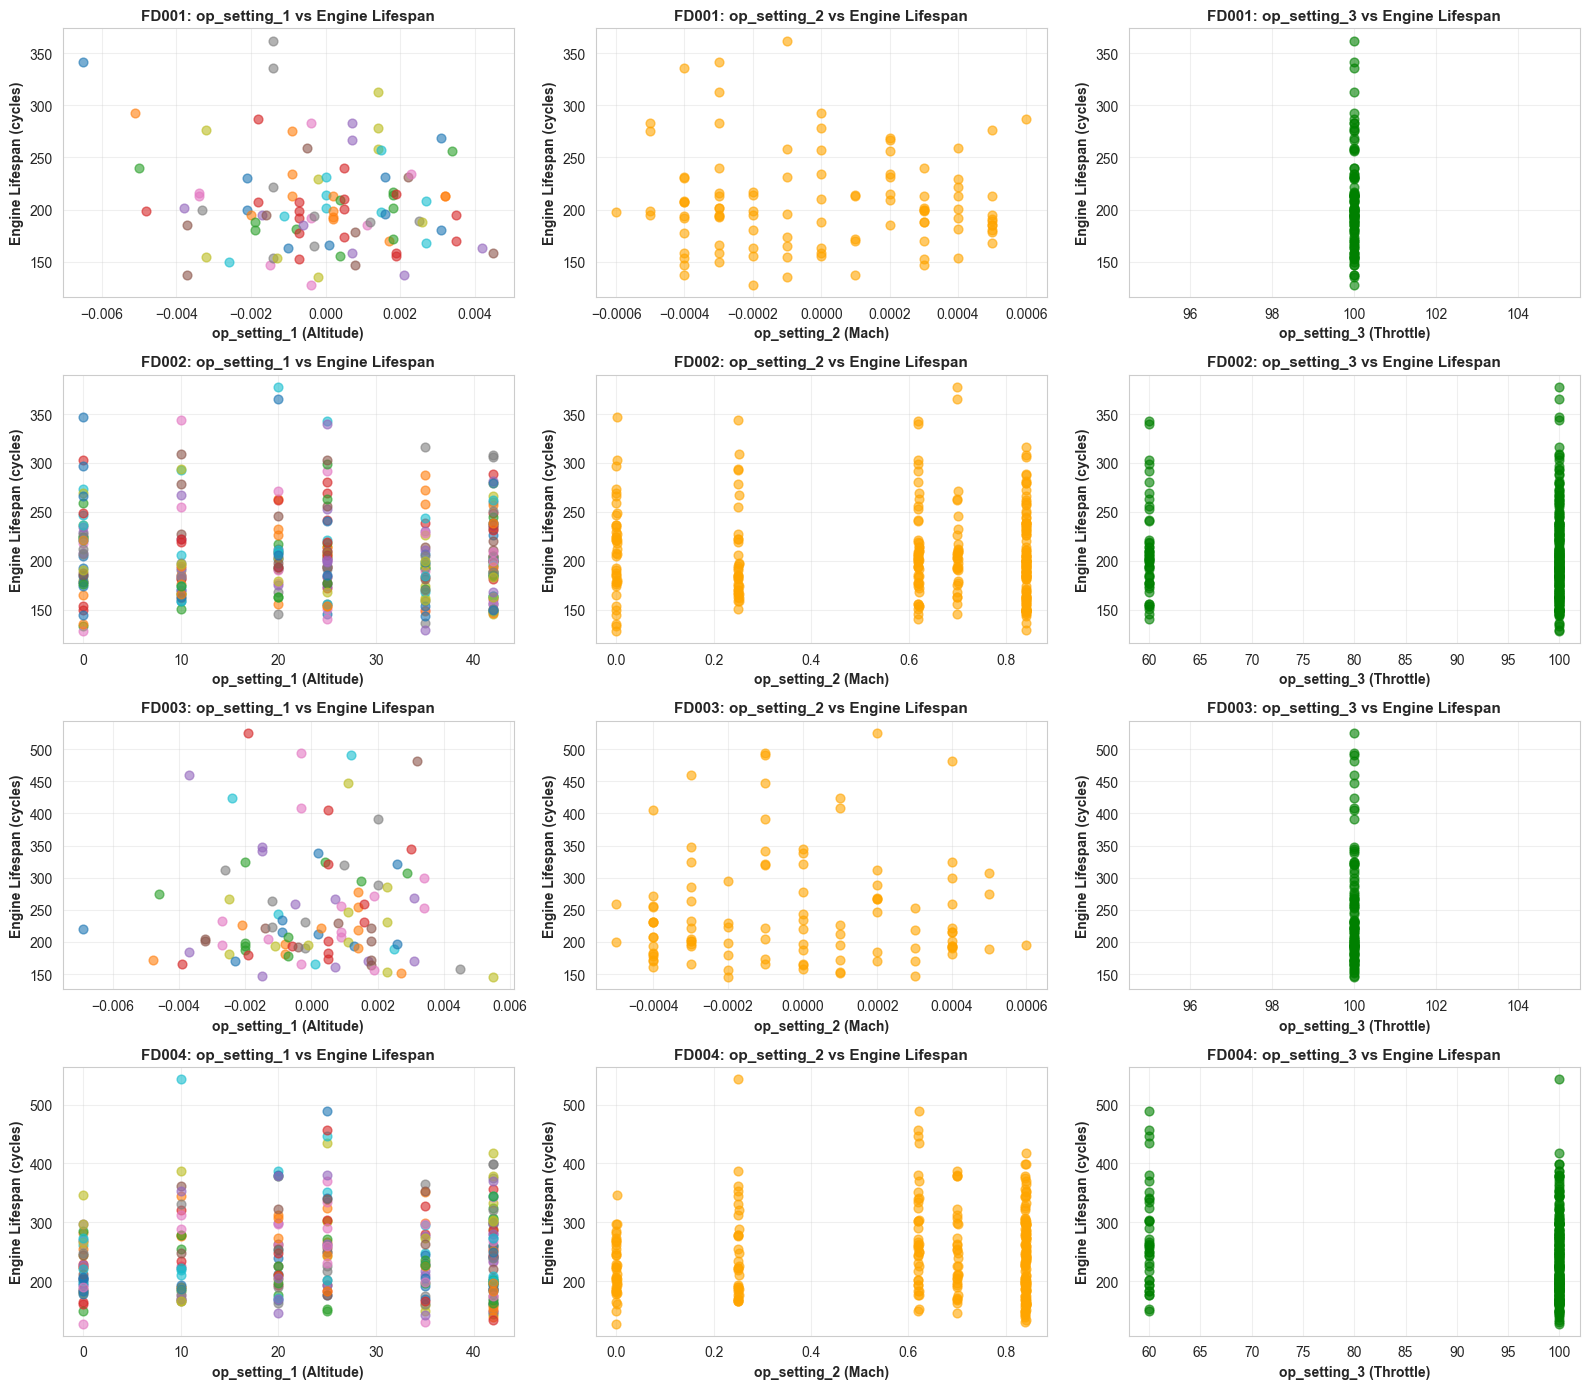

✅ Operating settings vs actual engine lifespan analysis complete


In [29]:
# SECTION 7: OPERATING SETTINGS INDIVIDUAL RELATIONSHIPS WITH ACTUAL ENGINE LIFESPAN

fig, axes = plt.subplots(4, 3, figsize=(16, 14))

for row, dataset in enumerate(['FD001', 'FD002', 'FD003', 'FD004']):
    df = train_dfs[dataset]
    
    # Get max time (lifespan) for each engine
    engine_lifespan = df.groupby('unit_id')['time'].max()
    
    # Create a dataframe with engine_id and their lifespan for plotting
    engine_data = df.drop_duplicates(subset=['unit_id'])[['unit_id', 'op_setting_1', 'op_setting_2', 'op_setting_3']].copy()
    engine_data['lifespan'] = engine_data['unit_id'].map(engine_lifespan)
    
    # op_setting_1 vs Engine Lifespan
    ax = axes[row, 0]
    for val in sorted(engine_data['op_setting_1'].unique()):
        subset = engine_data[engine_data['op_setting_1'] == val]['lifespan']
        ax.scatter([val] * len(subset), subset, alpha=0.6, s=40)
    ax.set_xlabel('op_setting_1 (Altitude)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Engine Lifespan (cycles)', fontsize=10, fontweight='bold')
    ax.set_title(f'{dataset}: op_setting_1 vs Engine Lifespan', fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)
    
    # op_setting_2 vs Engine Lifespan
    ax = axes[row, 1]
    for val in sorted(engine_data['op_setting_2'].unique()):
        subset = engine_data[engine_data['op_setting_2'] == val]['lifespan']
        ax.scatter([val] * len(subset), subset, alpha=0.6, s=40, color='orange')
    ax.set_xlabel('op_setting_2 (Mach)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Engine Lifespan (cycles)', fontsize=10, fontweight='bold')
    ax.set_title(f'{dataset}: op_setting_2 vs Engine Lifespan', fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)
    
    # op_setting_3 vs Engine Lifespan
    ax = axes[row, 2]
    for val in sorted(engine_data['op_setting_3'].unique()):
        subset = engine_data[engine_data['op_setting_3'] == val]['lifespan']
        ax.scatter([val] * len(subset), subset, alpha=0.6, s=40, color='green')
    ax.set_xlabel('op_setting_3 (Throttle)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Engine Lifespan (cycles)', fontsize=10, fontweight='bold')
    ax.set_title(f'{dataset}: op_setting_3 vs Engine Lifespan', fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Operating settings vs actual engine lifespan analysis complete")

#### **Insights**:
* **Regime Identification:** FD002 and FD004 clearly show 6 distinct clusters in Altitude and Mach settings, representing the 6 operational regimes mentioned in the research paper.
* **Independence of Settings:** There is no direct correlation between a specific setting (e.g., higher altitude) and a shorter lifespan; engines fail across a wide range of cycles regardless of the setting.
* **Baseline Shifts:** The clusters prove that settings act as environmental context that shifts sensor baselines rather than being direct indicators of wear.
* **Complexity Scaling:** FD003 and FD004 show higher lifespan variance (up to 500+ cycles) due to the addition of a second fault mode (Fan degradation).
* **Normalization Necessity:** Since settings don't predict RUL directly, they must be used to normalize sensors relative to their regime to remove environmental "noise".

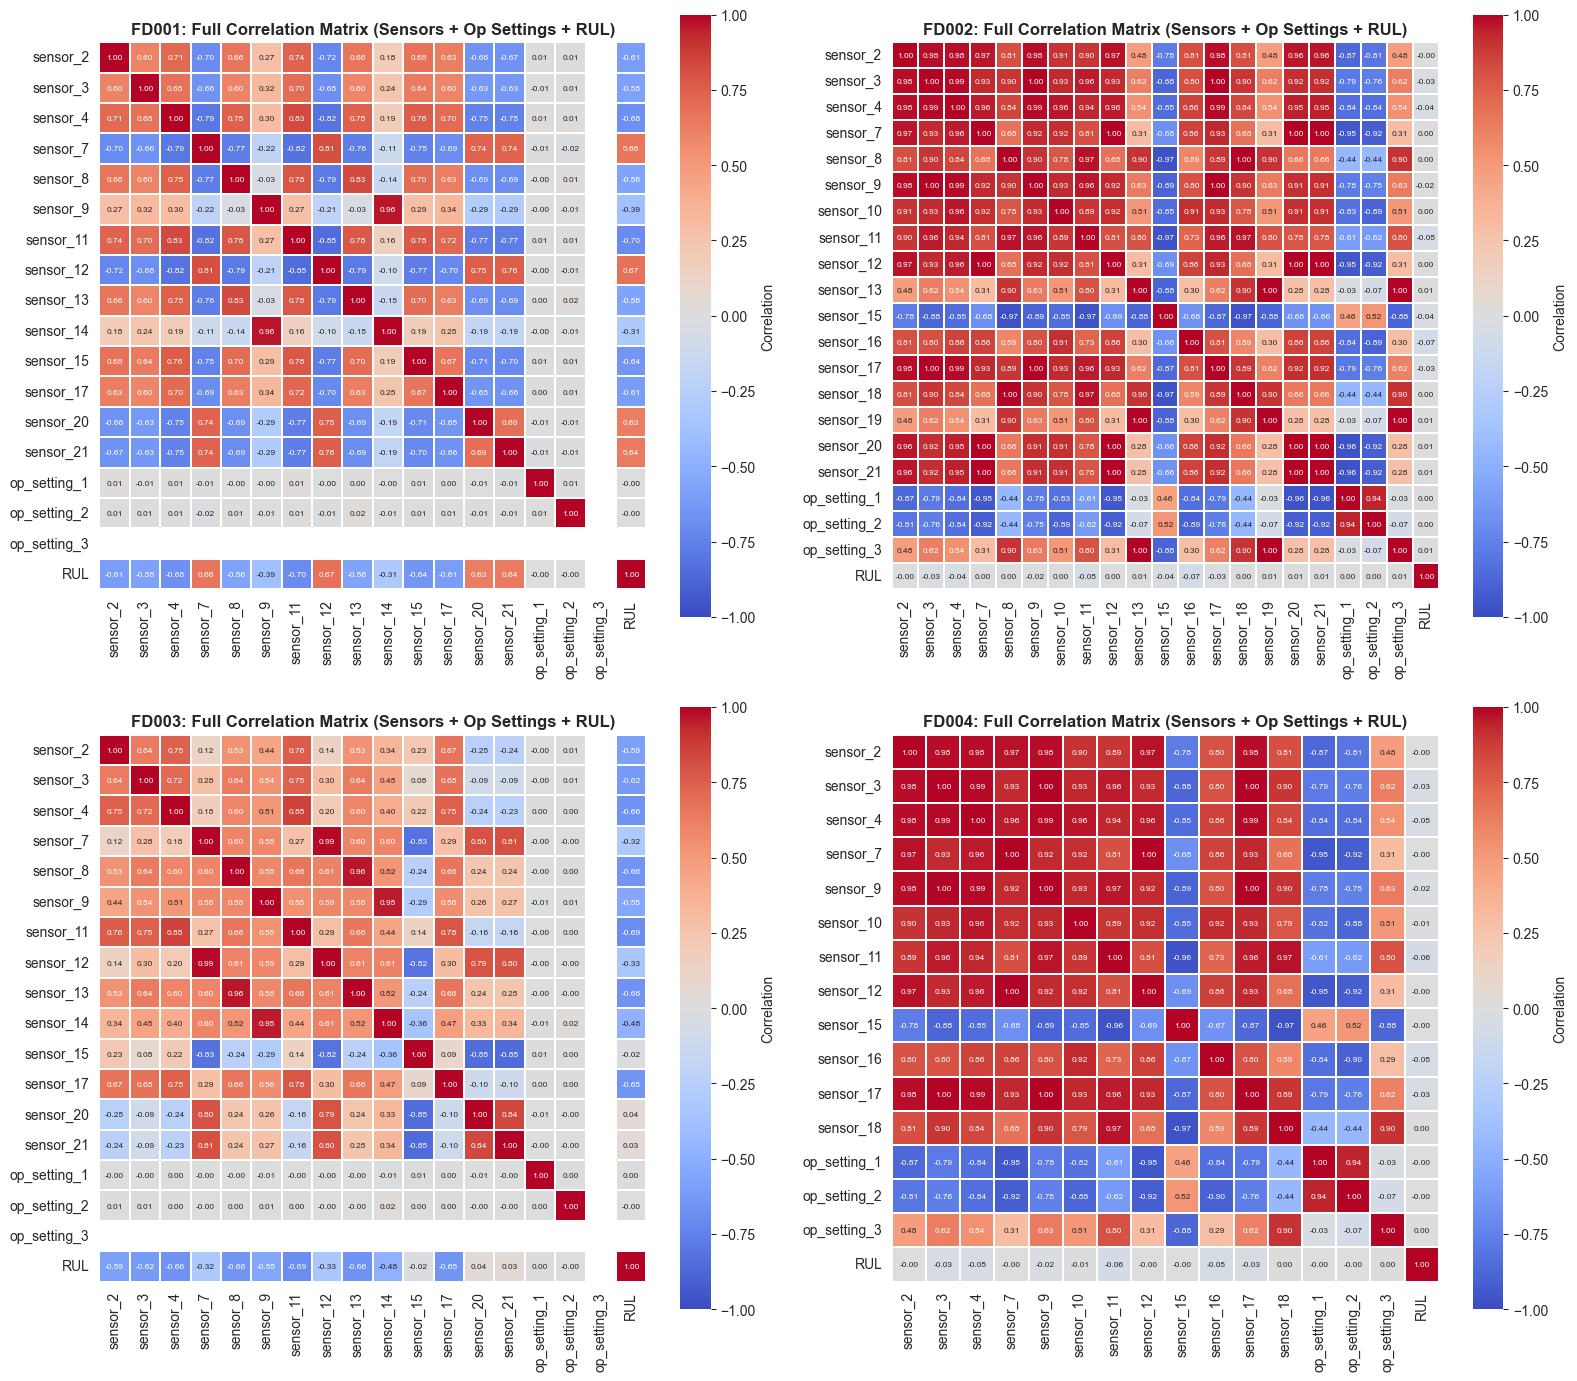

✅ Correlation matrix heatmap complete

SENSOR CORRELATIONS WITH RUL (sorted by absolute value)

FD001:
sensor_11   -0.696228
sensor_4    -0.678948
sensor_12    0.671983
sensor_7     0.657223
sensor_15   -0.642667
sensor_21    0.635662
sensor_20    0.629428
sensor_2    -0.606484
sensor_17   -0.606154
sensor_3    -0.584520
sensor_8    -0.563968
sensor_13   -0.562569
sensor_9    -0.390102
sensor_14   -0.306769

FD002:
sensor_16   -0.071352
sensor_11   -0.046950
sensor_4    -0.040978
sensor_15   -0.038455
sensor_17   -0.027031
sensor_3    -0.026942
sensor_9    -0.015306
sensor_20    0.006287
sensor_21    0.006165
sensor_19    0.005761
sensor_13    0.005245
sensor_2    -0.004928
sensor_18    0.004780
sensor_8     0.004345
sensor_10    0.004306
sensor_7     0.002430
sensor_12    0.002249

FD003:
sensor_11   -0.688915
sensor_4    -0.657224
sensor_13   -0.656340
sensor_8    -0.655345
sensor_17   -0.649220
sensor_3    -0.624236
sensor_2    -0.590564
sensor_9    -0.551843
sensor_14   -0.481807
s

In [30]:
# SECTION 8: CORRELATION MATRIX HEATMAP

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, dataset in enumerate(['FD001', 'FD002', 'FD003', 'FD004']):
    ax = axes[idx]
    
    df = train_dfs[dataset]
    
    # Get sensor columns
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    
    # Create correlation matrix (sensors + op_settings + RUL)
    corr_cols = sensor_cols + ['op_setting_1', 'op_setting_2', 'op_setting_3', 'RUL']
    corr_matrix = df[corr_cols].corr()
    
    # Create heatmap
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, ax=ax, cbar_kws={'label': 'Correlation'}, 
                annot_kws={'size': 6}, linewidths=0.3, vmin=-1, vmax=1)
    
    ax.set_title(f'{dataset}: Full Correlation Matrix (Sensors + Op Settings + RUL)', 
                 fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Correlation matrix heatmap complete")

# PRINT CORRELATION WITH RUL FOR EACH DATASET

print("\n" + "="*80)
print("SENSOR CORRELATIONS WITH RUL (sorted by absolute value)")
print("="*80)

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    df = train_dfs[dataset]
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    
    # Calculate correlation with RUL
    correlations = df[sensor_cols].corrwith(df['RUL']).sort_values(key=abs, ascending=False)
    
    print(f"\n{dataset}:")
    print(correlations.to_string())

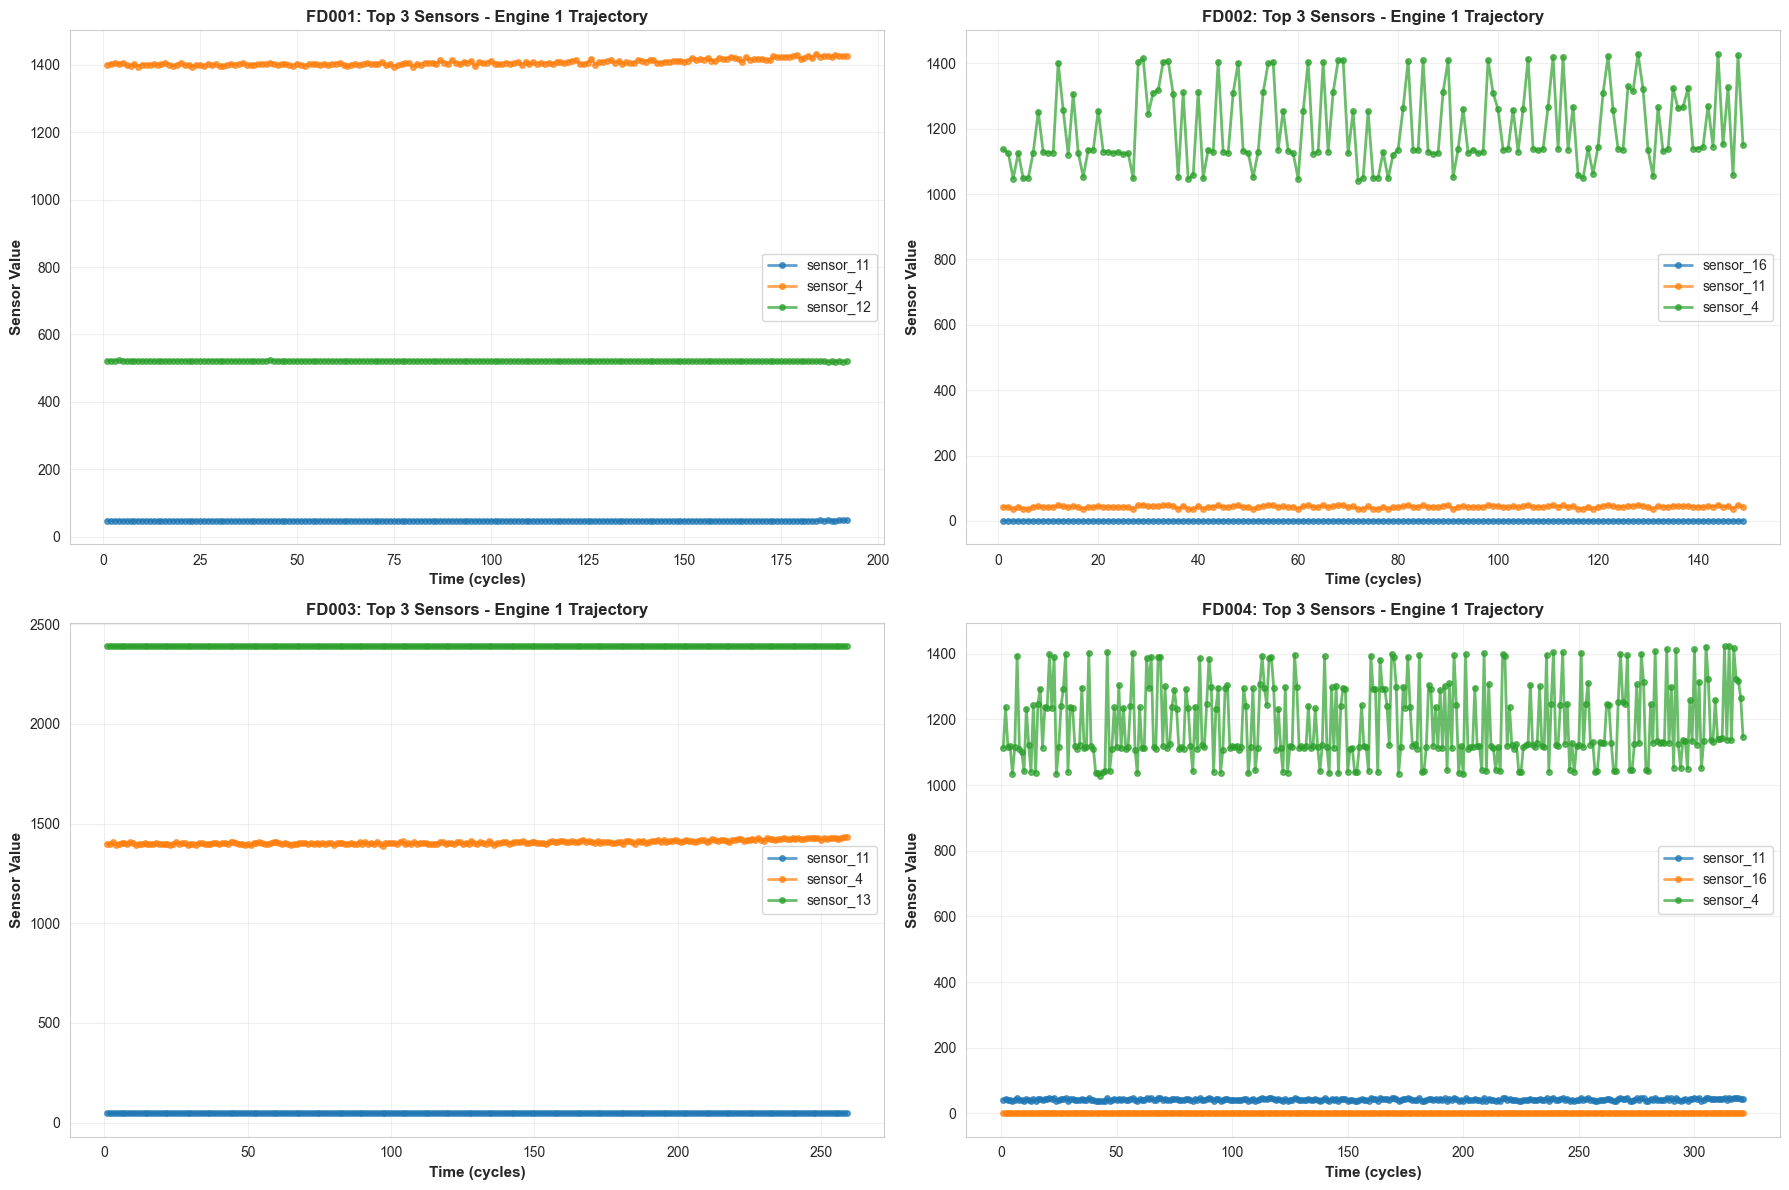

✅ Sensor degradation trajectories complete


In [31]:
# SECTION 9: SENSOR DEGRADATION PATTERNS OVER TIME (Per Regime)

# Purpose: Visualize how sensors degrade differently in each regime
# This will help us understand what rolling window size to use

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, dataset in enumerate(['FD001', 'FD002', 'FD003', 'FD004']):
    ax = axes[idx]
    
    df = train_dfs[dataset]
    
    # Get top 3 sensors by RUL correlation
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    top_sensors = df[sensor_cols].corrwith(df['RUL']).abs().nlargest(3).index.tolist()
    
    # Plot: Pick first engine, show top sensor values over time
    sample_engine = 1
    engine_data = df[df['unit_id'] == sample_engine].sort_values('time')
    
    for sensor in top_sensors:
        ax.plot(engine_data['time'], engine_data[sensor], marker='o', 
                label=sensor, linewidth=2, markersize=4, alpha=0.7)
    
    ax.set_xlabel('Time (cycles)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Sensor Value', fontsize=11, fontweight='bold')
    ax.set_title(f'{dataset}: Top 3 Sensors - Engine {sample_engine} Trajectory', 
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Sensor degradation trajectories complete")

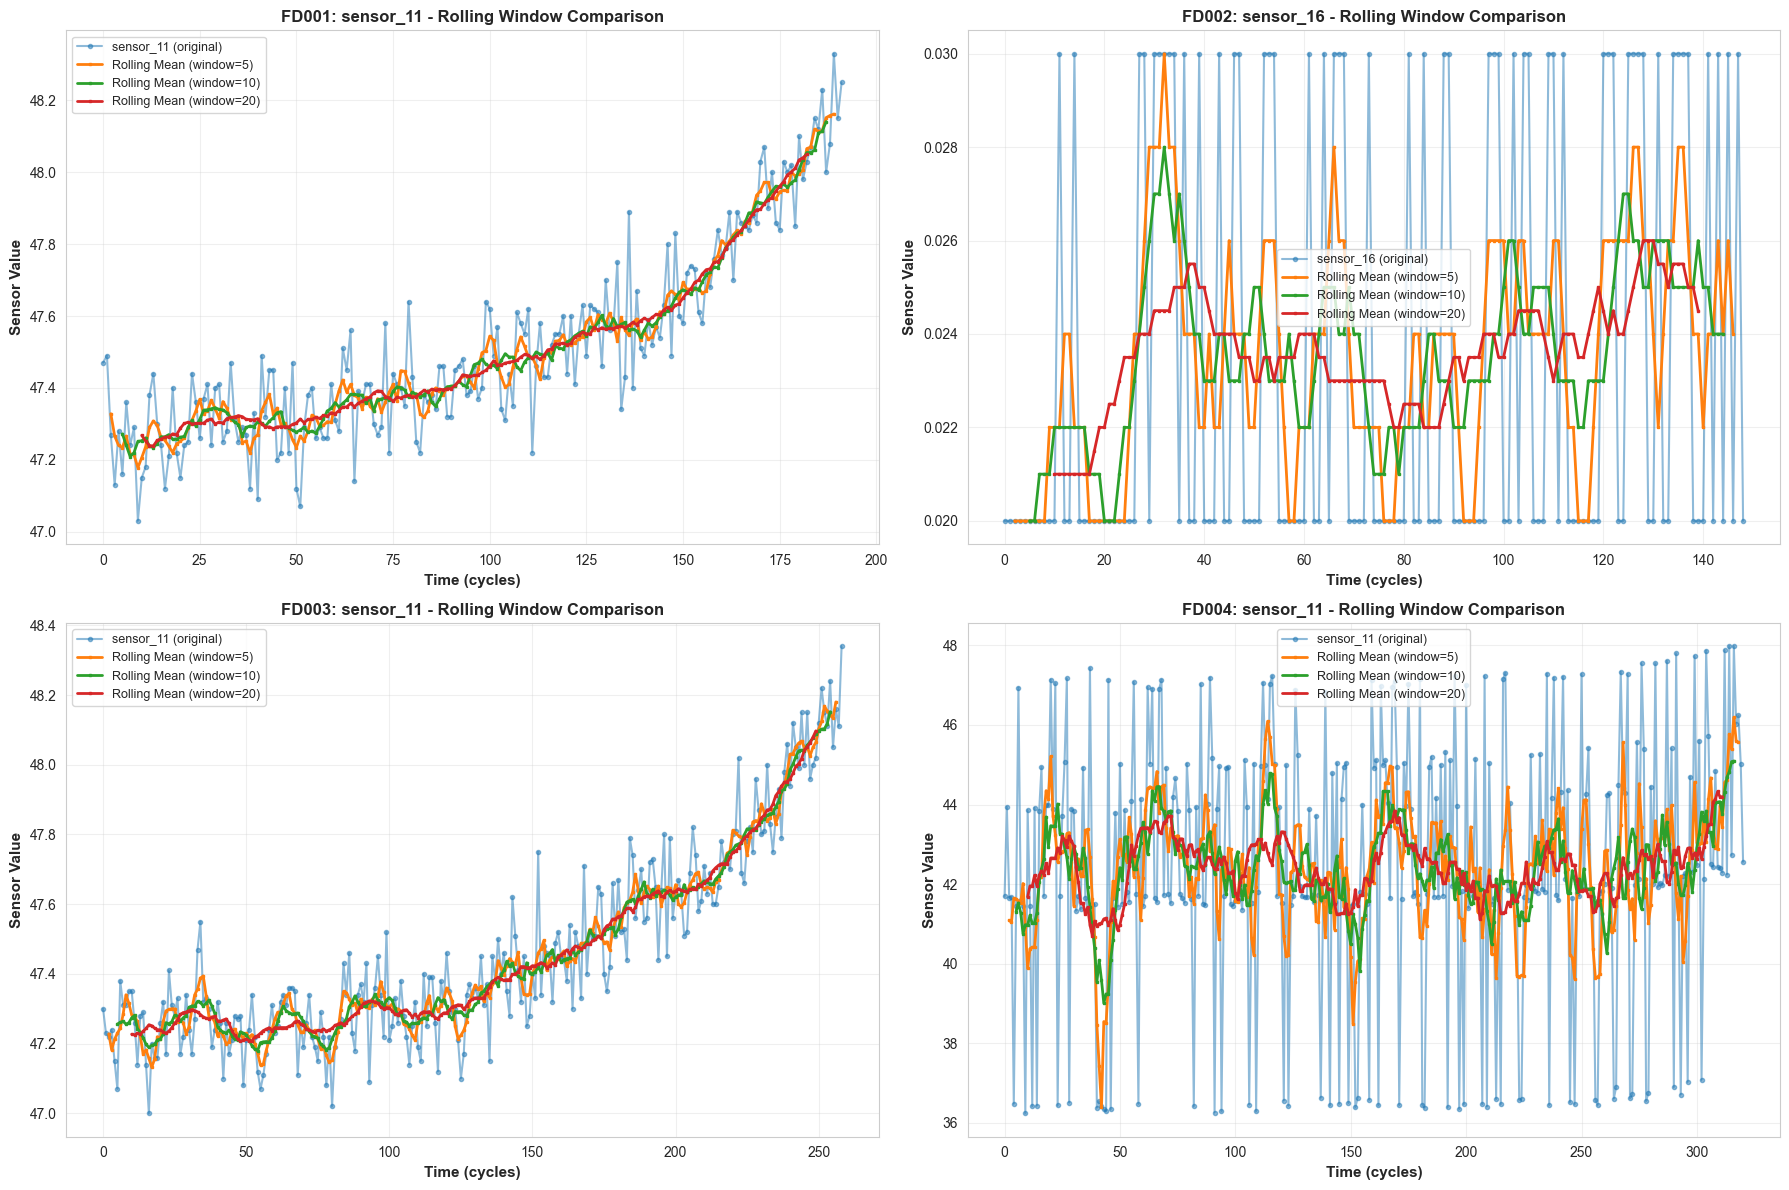

✅ Rolling statistics preview complete


In [32]:
# SECTION 10: ROLLING STATISTICS PREVIEW (Rolling Mean)
 
# Purpose: Show how rolling mean smooths sensor noise
# This helps decide rolling window size (5, 10, 20, 50?)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

window_sizes = [5, 10, 20]

for idx, dataset in enumerate(['FD001', 'FD002', 'FD003', 'FD004']):
    ax = axes[idx]
    
    df = train_dfs[dataset]
    
    # Get top sensor by RUL correlation
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    top_sensor = df[sensor_cols].corrwith(df['RUL']).abs().idxmax()
    
    # Plot: Pick first engine
    sample_engine = 1
    engine_data = df[df['unit_id'] == sample_engine].sort_values('time').reset_index(drop=True)
    
    # Original sensor
    ax.plot(engine_data.index, engine_data[top_sensor], 'o-', 
            label=f'{top_sensor} (original)', linewidth=1.5, markersize=3, alpha=0.5)
    
    # Rolling means
    for window in window_sizes:
        rolling_mean = engine_data[top_sensor].rolling(window=window, center=True).mean()
        ax.plot(engine_data.index, rolling_mean, 's-', 
                label=f'Rolling Mean (window={window})', linewidth=2, markersize=2)
    
    ax.set_xlabel('Time (cycles)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Sensor Value', fontsize=11, fontweight='bold')
    ax.set_title(f'{dataset}: {top_sensor} - Rolling Window Comparison', 
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Rolling statistics preview complete")

In [34]:
# ============================================================================
# SECTION 9: REGIME IDENTIFICATION USING K-MEANS CLUSTERING
# ============================================================================
# Strategy: Use K-Means to identify 6 distinct operating regimes
# based on op_setting_1, op_setting_2, op_setting_3

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print("="*80)
print("REGIME IDENTIFICATION - K-MEANS CLUSTERING (K=6)")
print("="*80)

# Store regime assignments for each dataset
regime_assignments = {}

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    df = train_dfs[dataset].copy()
    
    print(f"\n{dataset}:")
    
    # Extract operating settings
    op_settings = df[['op_setting_1', 'op_setting_2', 'op_setting_3']].values
    
    # Standardize operating settings for clustering
    scaler = StandardScaler()
    op_settings_scaled = scaler.fit_transform(op_settings)
    
    # K-Means clustering with K=6
    kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
    regime_id = kmeans.fit_predict(op_settings_scaled)
    
    # Add regime_id to dataframe
    df['regime_id'] = regime_id
    
    # Store back in dictionary
    train_dfs[dataset] = df
    regime_assignments[dataset] = kmeans
    
    # Print regime distribution
    regime_counts = df['regime_id'].value_counts().sort_index()
    print(f"  Regimes identified: {len(regime_counts)}")
    print(f"\n  Data points per regime:")
    print(regime_counts.to_string())
    
    # Show regime centers (cluster centers in original scale)
    regime_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    print(f"\n  Regime Centers (Original Scale):")
    regime_df = pd.DataFrame(
        regime_centers,
        columns=['op_setting_1', 'op_setting_2', 'op_setting_3']
    )
    regime_df.index.name = 'regime_id'
    print(regime_df.to_string())

print("\n✅ Regime clustering complete for all datasets")

REGIME IDENTIFICATION - K-MEANS CLUSTERING (K=6)

FD001:
  Regimes identified: 6

  Data points per regime:
0    2783
1    3687
2    2580
3    3778
4    3872
5    3931

  Regime Centers (Original Scale):
           op_setting_1  op_setting_2  op_setting_3
regime_id                                          
0             -0.002802      0.000225         100.0
1             -0.002075     -0.000306         100.0
2              0.003028      0.000201         100.0
3              0.001800     -0.000319         100.0
4              0.000131      0.000349         100.0
5              0.000052     -0.000028         100.0

FD002:
  Regimes identified: 6

  Data points per regime:
0     8002
1     8122
2     8044
3    13458
4     8096
5     8037

  Regime Centers (Original Scale):
           op_setting_1  op_setting_2  op_setting_3
regime_id                                          
0             25.003038      0.620502          60.0
1             20.002999      0.700515         100.0
2          

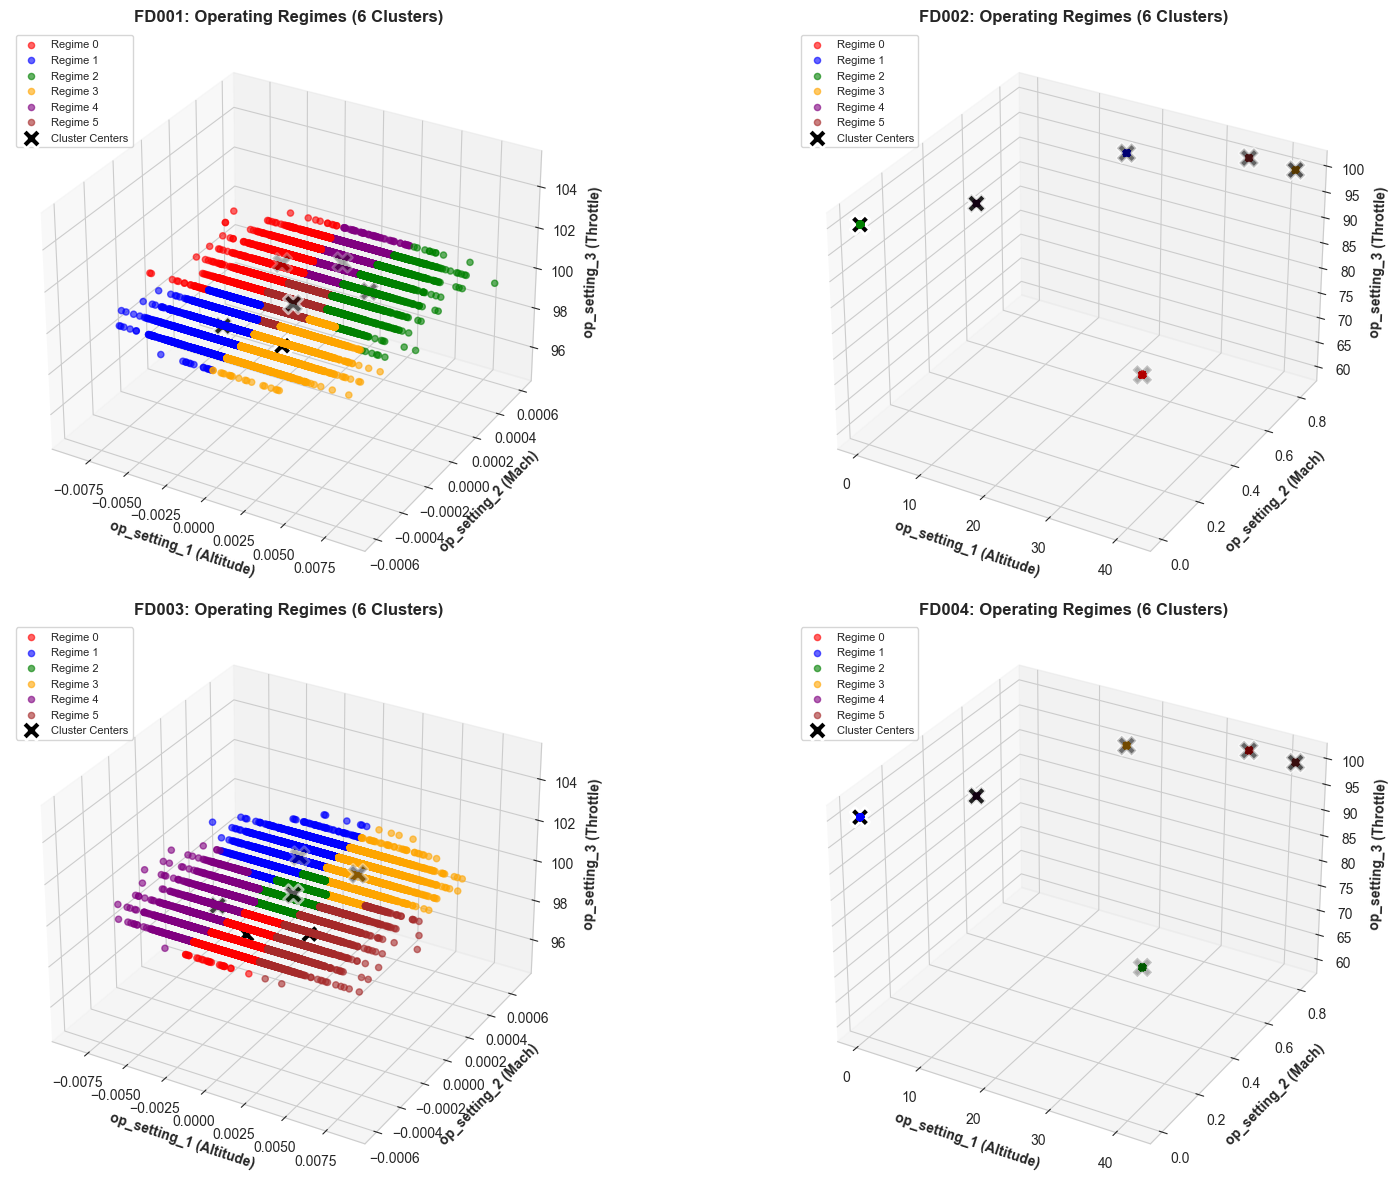

✅ 3D regime cluster visualization complete


In [36]:
# ============================================================================
# SECTION 9B: VISUALIZE REGIME CLUSTERS
# ============================================================================
# Purpose: See the 6 clusters in 3D space (op_setting_1, op_setting_2, op_setting_3)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 12))

for idx, dataset in enumerate(['FD001', 'FD002', 'FD003', 'FD004'], 1):
    ax = fig.add_subplot(2, 2, idx, projection='3d')
    
    df = train_dfs[dataset]
    
    # Get operating settings and regime assignments
    op_settings = df[['op_setting_1', 'op_setting_2', 'op_setting_3']].values
    regime_ids = df['regime_id'].values
    
    # Create scatter plot with different colors for each regime
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    for regime in range(6):
        mask = regime_ids == regime
        ax.scatter(op_settings[mask, 0], op_settings[mask, 1], op_settings[mask, 2],
                  c=colors[regime], label=f'Regime {regime}', s=20, alpha=0.6)
    
    # Plot cluster centers
    kmeans = regime_assignments[dataset]
    scaler = StandardScaler()
    op_settings_scaled = scaler.fit_transform(op_settings)
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
              c='black', marker='X', s=200, edgecolors='white', linewidths=2,
              label='Cluster Centers')
    
    ax.set_xlabel('op_setting_1 (Altitude)', fontsize=10, fontweight='bold')
    ax.set_ylabel('op_setting_2 (Mach)', fontsize=10, fontweight='bold')
    ax.set_zlabel('op_setting_3 (Throttle)', fontsize=10, fontweight='bold')
    ax.set_title(f'{dataset}: Operating Regimes (6 Clusters)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.show()

print("✅ 3D regime cluster visualization complete")

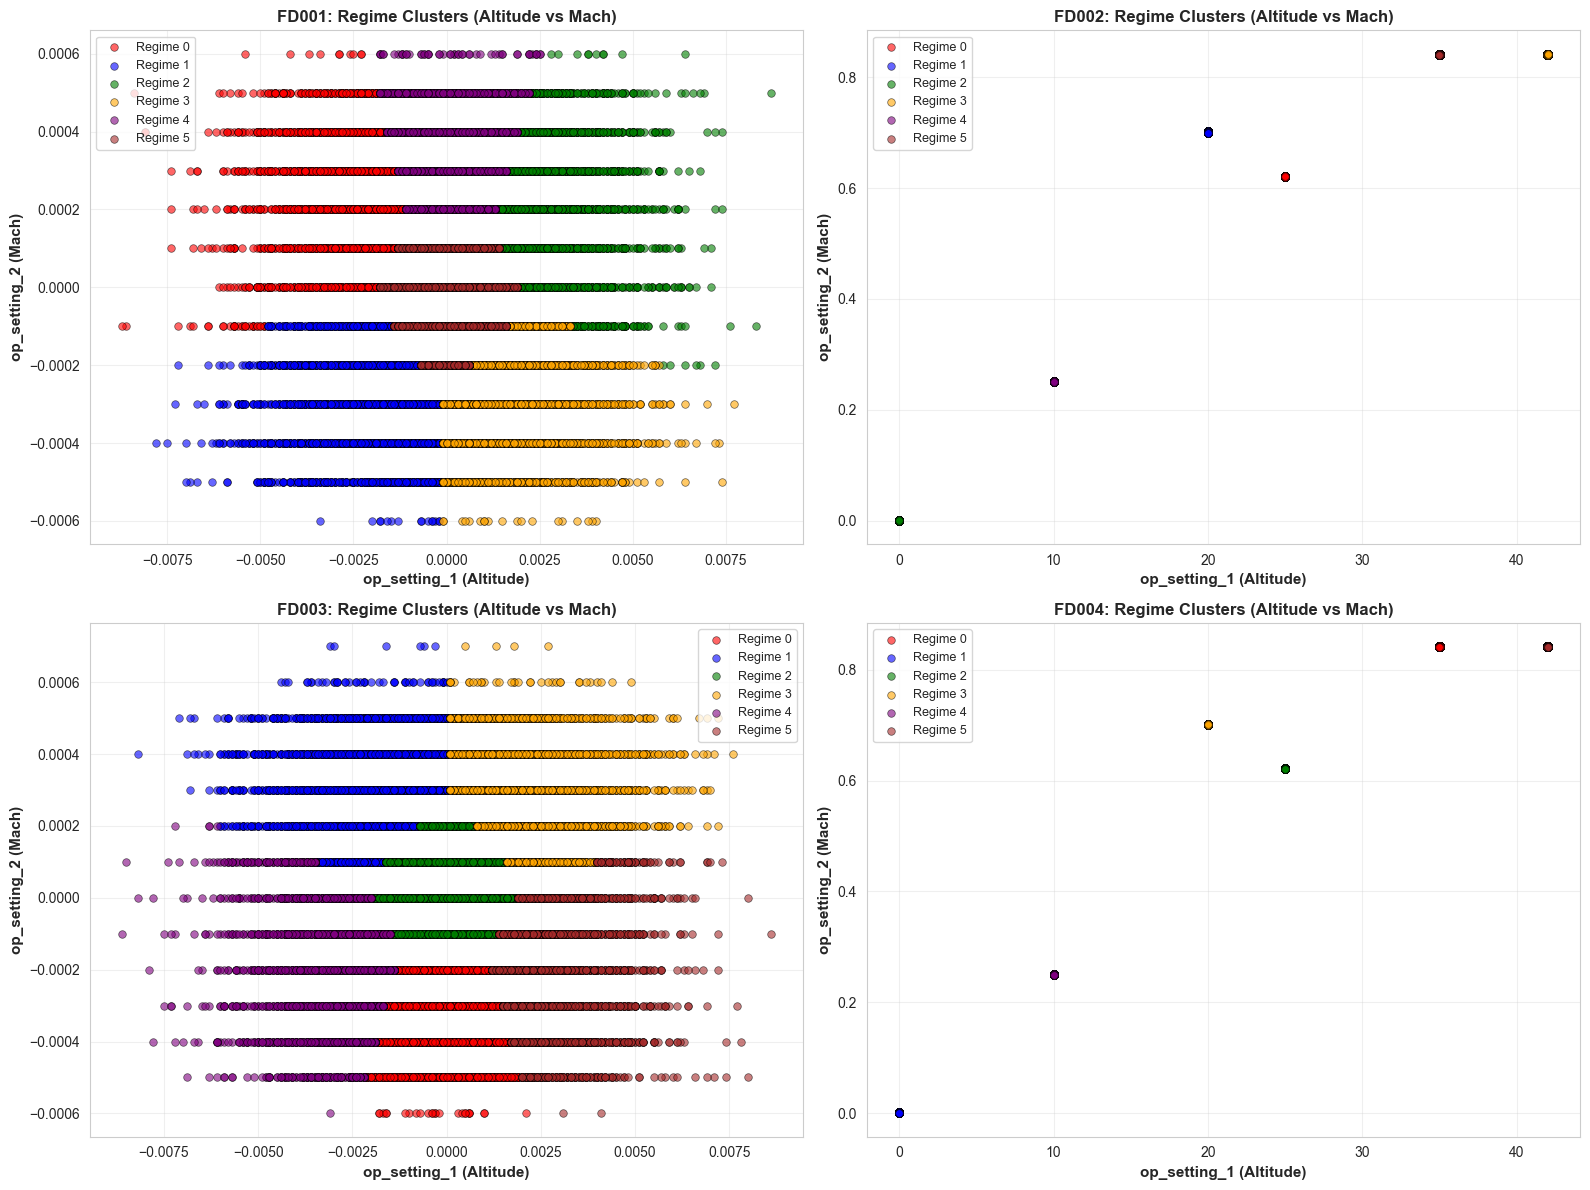

✅ 2D regime cluster visualization complete


In [37]:
# ============================================================================
# SECTION 9C: 2D REGIME CLUSTER VISUALIZATION (Pairwise Plots)
# ============================================================================
# Purpose: See regime clusters from different angle combinations

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for idx, dataset in enumerate(['FD001', 'FD002', 'FD003', 'FD004']):
    ax = axes[idx]
    
    df = train_dfs[dataset]
    
    # Plot: op_setting_1 vs op_setting_2, colored by regime
    for regime in range(6):
        regime_data = df[df['regime_id'] == regime]
        ax.scatter(regime_data['op_setting_1'], regime_data['op_setting_2'],
                  c=colors[regime], label=f'Regime {regime}', s=30, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    ax.set_xlabel('op_setting_1 (Altitude)', fontsize=11, fontweight='bold')
    ax.set_ylabel('op_setting_2 (Mach)', fontsize=11, fontweight='bold')
    ax.set_title(f'{dataset}: Regime Clusters (Altitude vs Mach)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc='best')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ 2D regime cluster visualization complete")

In [35]:
# ============================================================================
# SECTION 9D: REGIME SIZE & COMPOSITION SUMMARY
# ============================================================================

print("\n" + "="*80)
print("REGIME CLUSTER SUMMARY")
print("="*80)

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    df = train_dfs[dataset]
    
    print(f"\n{dataset}:")
    
    # For each regime, show composition
    for regime in range(6):
        regime_data = df[df['regime_id'] == regime]
        
        if len(regime_data) > 0:
            unique_engines = regime_data['unit_id'].nunique()
            num_rows = len(regime_data)
            
            # Get the representative op_settings for this regime
            op_set_1 = regime_data['op_setting_1'].iloc[0]
            op_set_2 = regime_data['op_setting_2'].iloc[0]
            op_set_3 = regime_data['op_setting_3'].iloc[0]
            
            print(f"  Regime {regime}:")
            print(f"    Op Settings: ({op_set_1:.4f}, {op_set_2:.4f}, {op_set_3:.4f})")
            print(f"    Data points: {num_rows}")
            print(f"    Unique engines: {unique_engines}")

print("\n✅ Regime composition summary complete")


REGIME CLUSTER SUMMARY

FD001:
  Regime 0:
    Op Settings: (-0.0043, 0.0003, 100.0000)
    Data points: 2783
    Unique engines: 100
  Regime 1:
    Op Settings: (-0.0007, -0.0004, 100.0000)
    Data points: 3687
    Unique engines: 100
  Regime 2:
    Op Settings: (0.0016, 0.0002, 100.0000)
    Data points: 2580
    Unique engines: 100
  Regime 3:
    Op Settings: (0.0019, -0.0003, 100.0000)
    Data points: 3778
    Unique engines: 100
  Regime 4:
    Op Settings: (0.0006, 0.0005, 100.0000)
    Data points: 3872
    Unique engines: 100
  Regime 5:
    Op Settings: (0.0007, 0.0000, 100.0000)
    Data points: 3931
    Unique engines: 100

FD002:
  Regime 0:
    Op Settings: (24.9988, 0.6218, 60.0000)
    Data points: 8002
    Unique engines: 260
  Regime 1:
    Op Settings: (20.0020, 0.7002, 100.0000)
    Data points: 8122
    Unique engines: 260
  Regime 2:
    Op Settings: (0.0015, 0.0010, 100.0000)
    Data points: 8044
    Unique engines: 260
  Regime 3:
    Op Settings: (41.9982


FD001 - Top 5 sensors:
sensor_11    0.696228
sensor_4     0.678948
sensor_12    0.671983
sensor_7     0.657223
sensor_15    0.642667

FD002 - Top 5 sensors:
sensor_16    0.071352
sensor_11    0.046950
sensor_4     0.040978
sensor_15    0.038455
sensor_17    0.027031

FD003 - Top 5 sensors:
sensor_11    0.688915
sensor_4     0.657224
sensor_13    0.656340
sensor_8     0.655345
sensor_17    0.649220

FD004 - Top 5 sensors:
sensor_11    0.056639
sensor_16    0.053804
sensor_4     0.045881
sensor_17    0.032939
sensor_3     0.032924


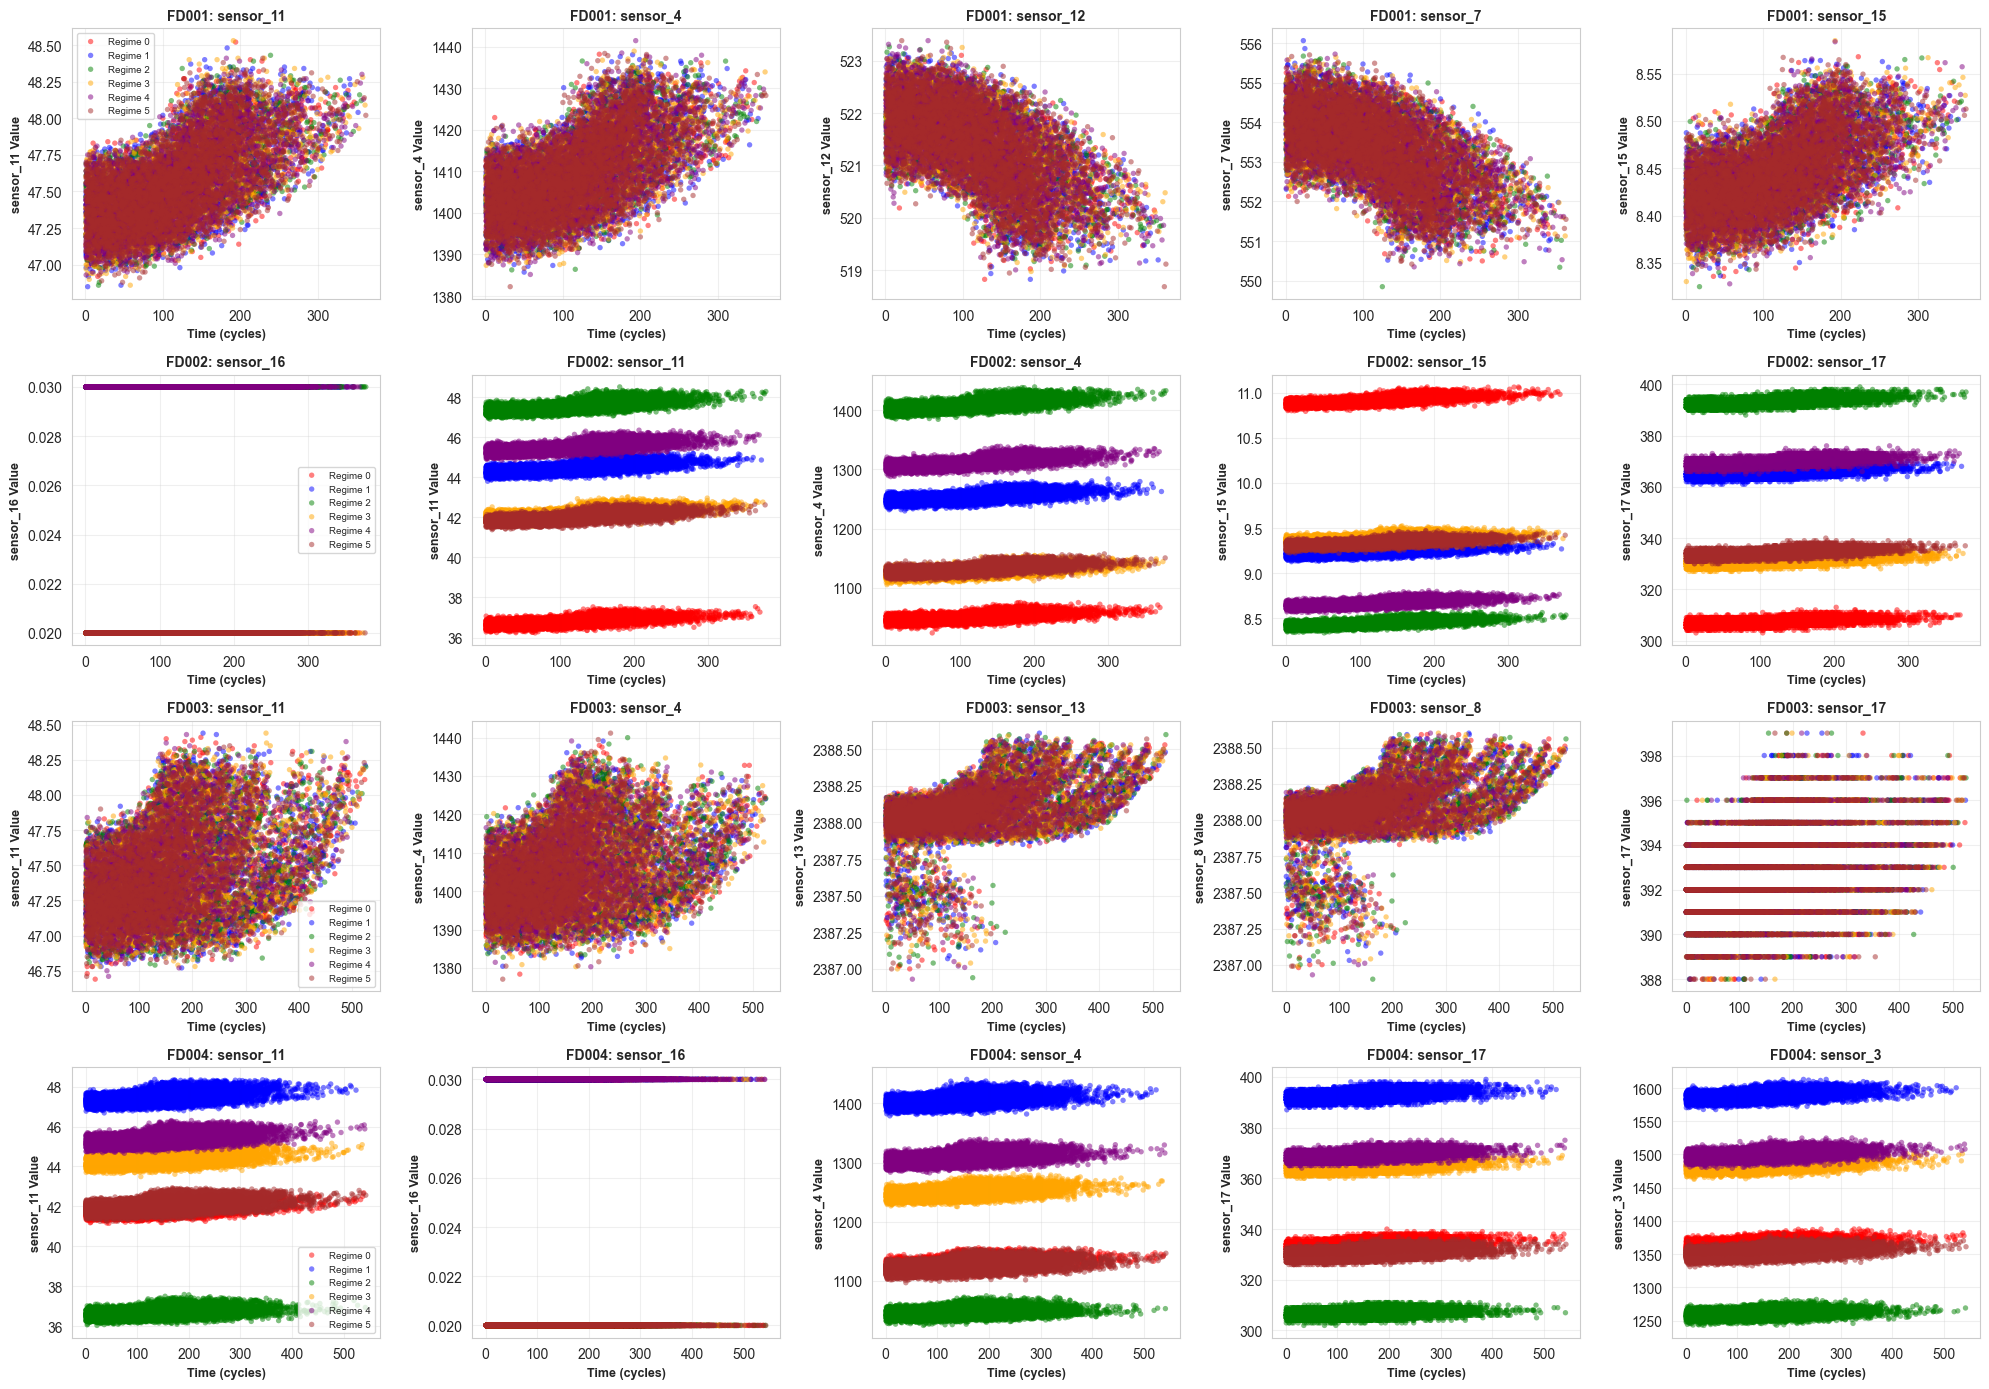


✅ Top 5 sensors by regime visualization complete


In [38]:
# ============================================================================
# SECTION 9E: TOP 5 SENSORS COLORED BY REGIME CLUSTERS
# ============================================================================
# Purpose: Visualize how top predictive sensors vary across different regimes

fig, axes = plt.subplots(4, 5, figsize=(20, 14))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for row_idx, dataset in enumerate(['FD001', 'FD002', 'FD003', 'FD004']):
    df = train_dfs[dataset]
    
    # Get top 5 sensors by RUL correlation
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    top_5_sensors = df[sensor_cols].corrwith(df['RUL']).abs().nlargest(5).index.tolist()
    
    print(f"\n{dataset} - Top 5 sensors:")
    print(df[sensor_cols].corrwith(df['RUL']).abs().nlargest(5).to_string())
    
    for col_idx, sensor in enumerate(top_5_sensors):
        ax = axes[row_idx, col_idx]
        
        # Plot each regime with different color
        for regime in range(6):
            regime_data = df[df['regime_id'] == regime]
            
            if len(regime_data) > 0:
                ax.scatter(regime_data['time'], regime_data[sensor],
                          c=colors[regime], label=f'Regime {regime}',
                          s=15, alpha=0.5, edgecolors='none')
        
        ax.set_xlabel('Time (cycles)', fontsize=9, fontweight='bold')
        ax.set_ylabel(f'{sensor} Value', fontsize=9, fontweight='bold')
        ax.set_title(f'{dataset}: {sensor}', fontsize=10, fontweight='bold')
        ax.grid(alpha=0.3)
        
        # Add legend only to first subplot of each row
        if col_idx == 0:
            ax.legend(fontsize=7, loc='best')

plt.tight_layout()
plt.show()

print("\n✅ Top 5 sensors by regime visualization complete")


FD001 - Top 5 sensors by RUL correlation:
sensor_11    0.696228
sensor_4     0.678948
sensor_12    0.671983
sensor_7     0.657223
sensor_15    0.642667

FD002 - Top 5 sensors by RUL correlation:
sensor_16    0.071352
sensor_11    0.046950
sensor_4     0.040978
sensor_15    0.038455
sensor_17    0.027031

FD003 - Top 5 sensors by RUL correlation:
sensor_11    0.688915
sensor_4     0.657224
sensor_13    0.656340
sensor_8     0.655345
sensor_17    0.649220

FD004 - Top 5 sensors by RUL correlation:
sensor_11    0.056639
sensor_16    0.053804
sensor_4     0.045881
sensor_17    0.032939
sensor_3     0.032924


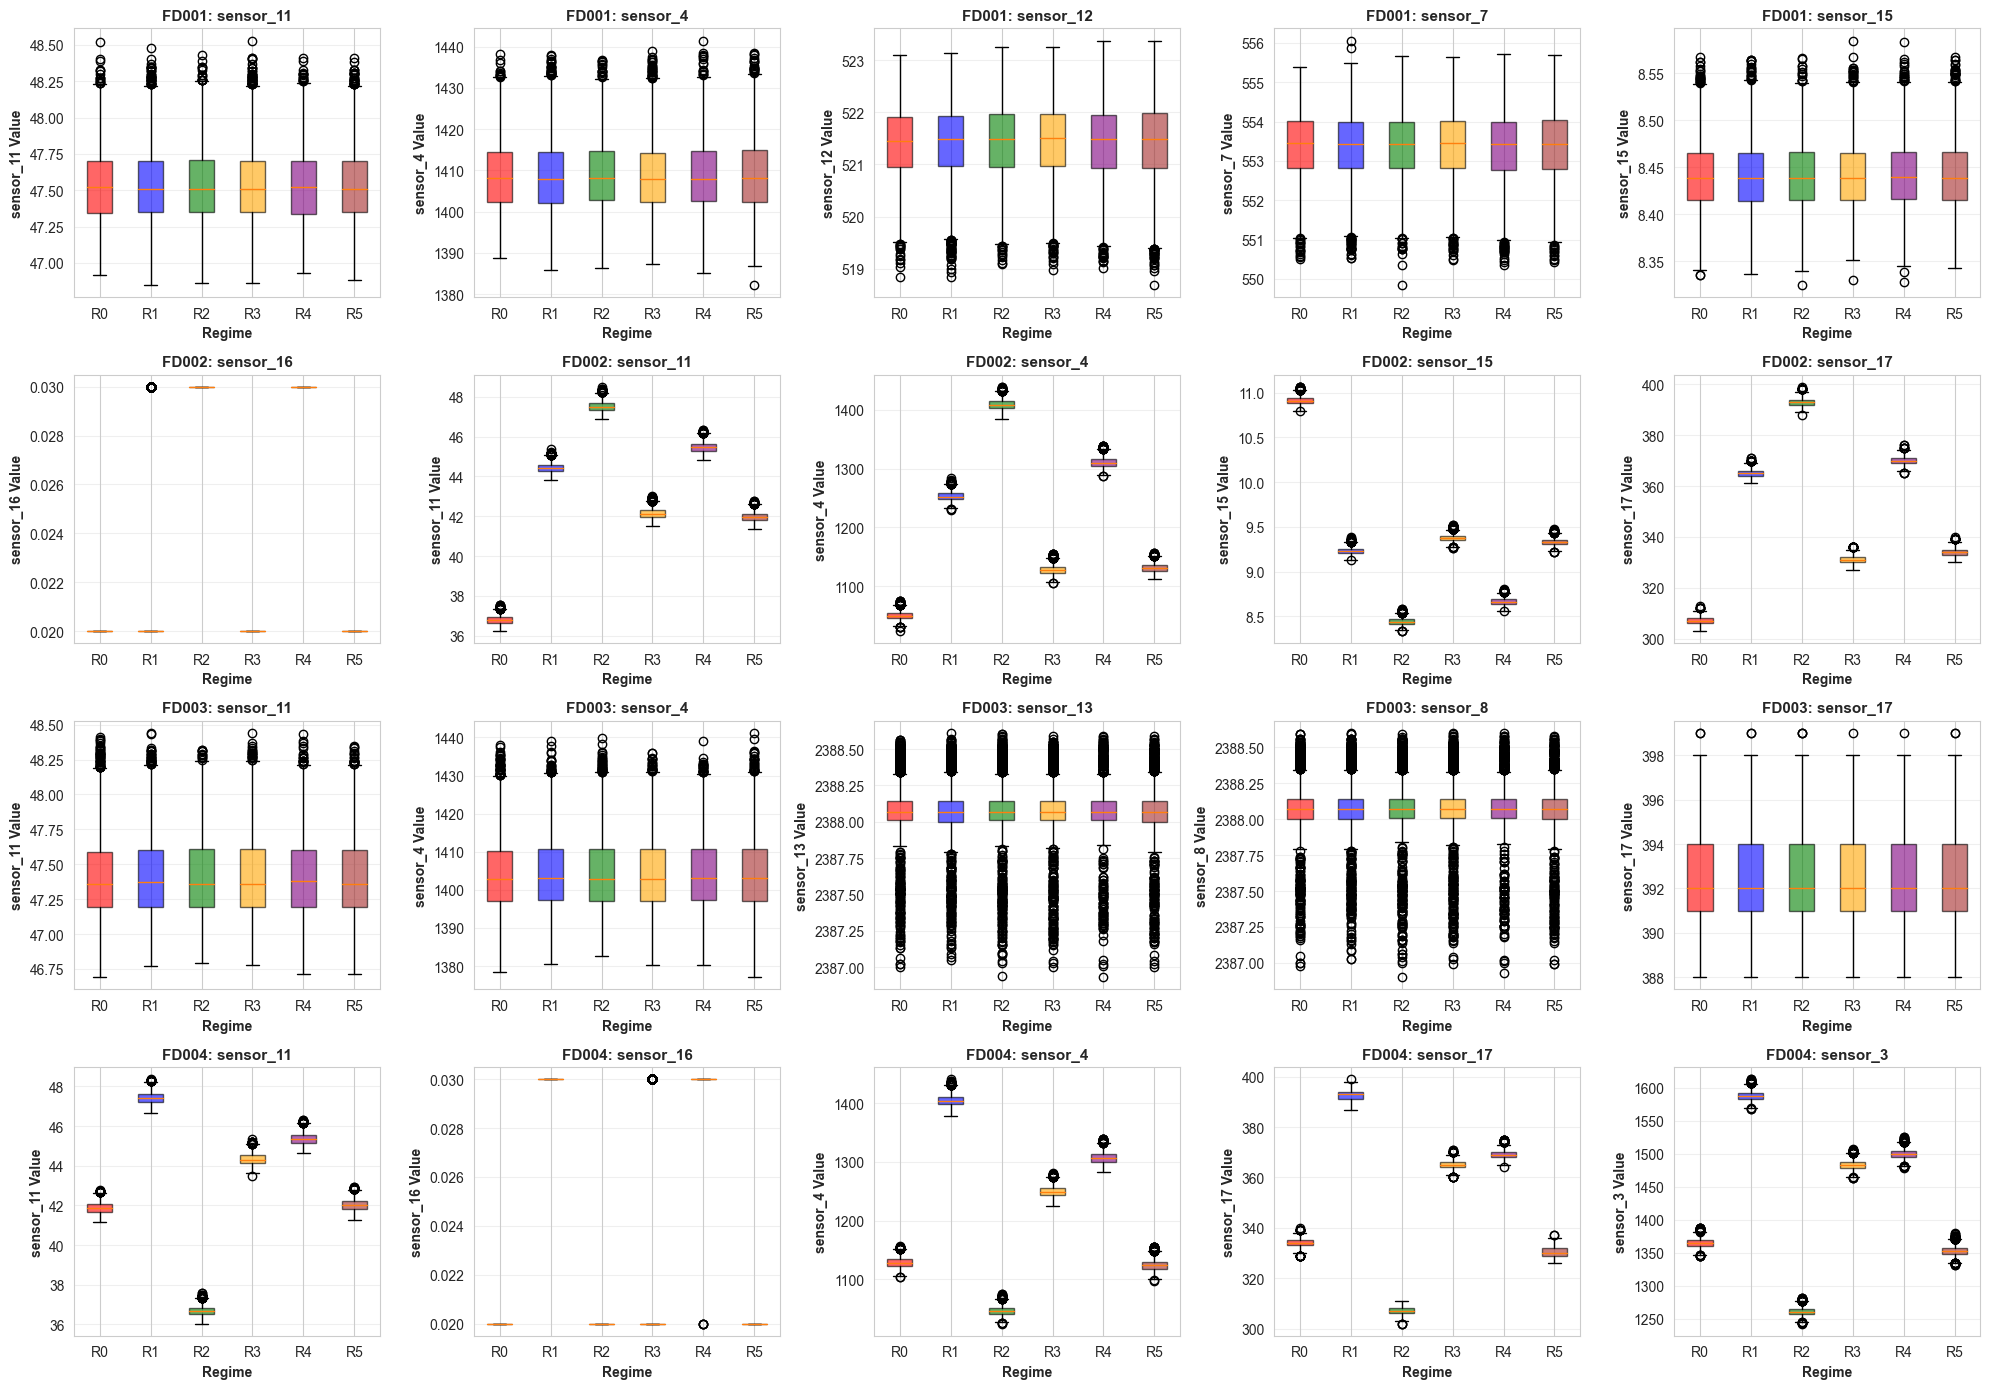


✅ Top 5 sensors vs regime clusters (box plot) complete


In [39]:
# ============================================================================
# SECTION 9F: TOP 5 SENSORS vs REGIME CLUSTERS (Box Plot)
# ============================================================================
# Purpose: Show sensor value distribution for each regime
# X-axis: Regime clusters (0-5)
# Y-axis: Sensor values

fig, axes = plt.subplots(4, 5, figsize=(20, 14))

for row_idx, dataset in enumerate(['FD001', 'FD002', 'FD003', 'FD004']):
    df = train_dfs[dataset]
    
    # Get top 5 sensors by RUL correlation
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    top_5_sensors = df[sensor_cols].corrwith(df['RUL']).abs().nlargest(5).index.tolist()
    
    print(f"\n{dataset} - Top 5 sensors by RUL correlation:")
    print(df[sensor_cols].corrwith(df['RUL']).abs().nlargest(5).to_string())
    
    for col_idx, sensor in enumerate(top_5_sensors):
        ax = axes[row_idx, col_idx]
        
        # Prepare data for box plot
        regime_data = []
        regime_labels = []
        
        for regime in range(6):
            sensor_values = df[df['regime_id'] == regime][sensor].values
            if len(sensor_values) > 0:
                regime_data.append(sensor_values)
                regime_labels.append(f'R{regime}')
        
        # Create box plot
        bp = ax.boxplot(regime_data, labels=regime_labels, patch_artist=True)
        
        # Color the boxes
        colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
        for patch, color in zip(bp['boxes'], colors[:len(regime_data)]):
            patch.set_facecolor(color)
            patch.set_alpha(0.6)
        
        ax.set_xlabel('Regime', fontsize=10, fontweight='bold')
        ax.set_ylabel(f'{sensor} Value', fontsize=10, fontweight='bold')
        ax.set_title(f'{dataset}: {sensor}', fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Top 5 sensors vs regime clusters (box plot) complete")


FD001 - Top 5 sensors by RUL correlation:
sensor_11    0.696228
sensor_4     0.678948
sensor_12    0.671983
sensor_7     0.657223
sensor_15    0.642667

FD002 - Top 5 sensors by RUL correlation:
sensor_16    0.071352
sensor_11    0.046950
sensor_4     0.040978
sensor_15    0.038455
sensor_17    0.027031

FD003 - Top 5 sensors by RUL correlation:
sensor_11    0.688915
sensor_4     0.657224
sensor_13    0.656340
sensor_8     0.655345
sensor_17    0.649220

FD004 - Top 5 sensors by RUL correlation:
sensor_11    0.056639
sensor_16    0.053804
sensor_4     0.045881
sensor_17    0.032939
sensor_3     0.032924


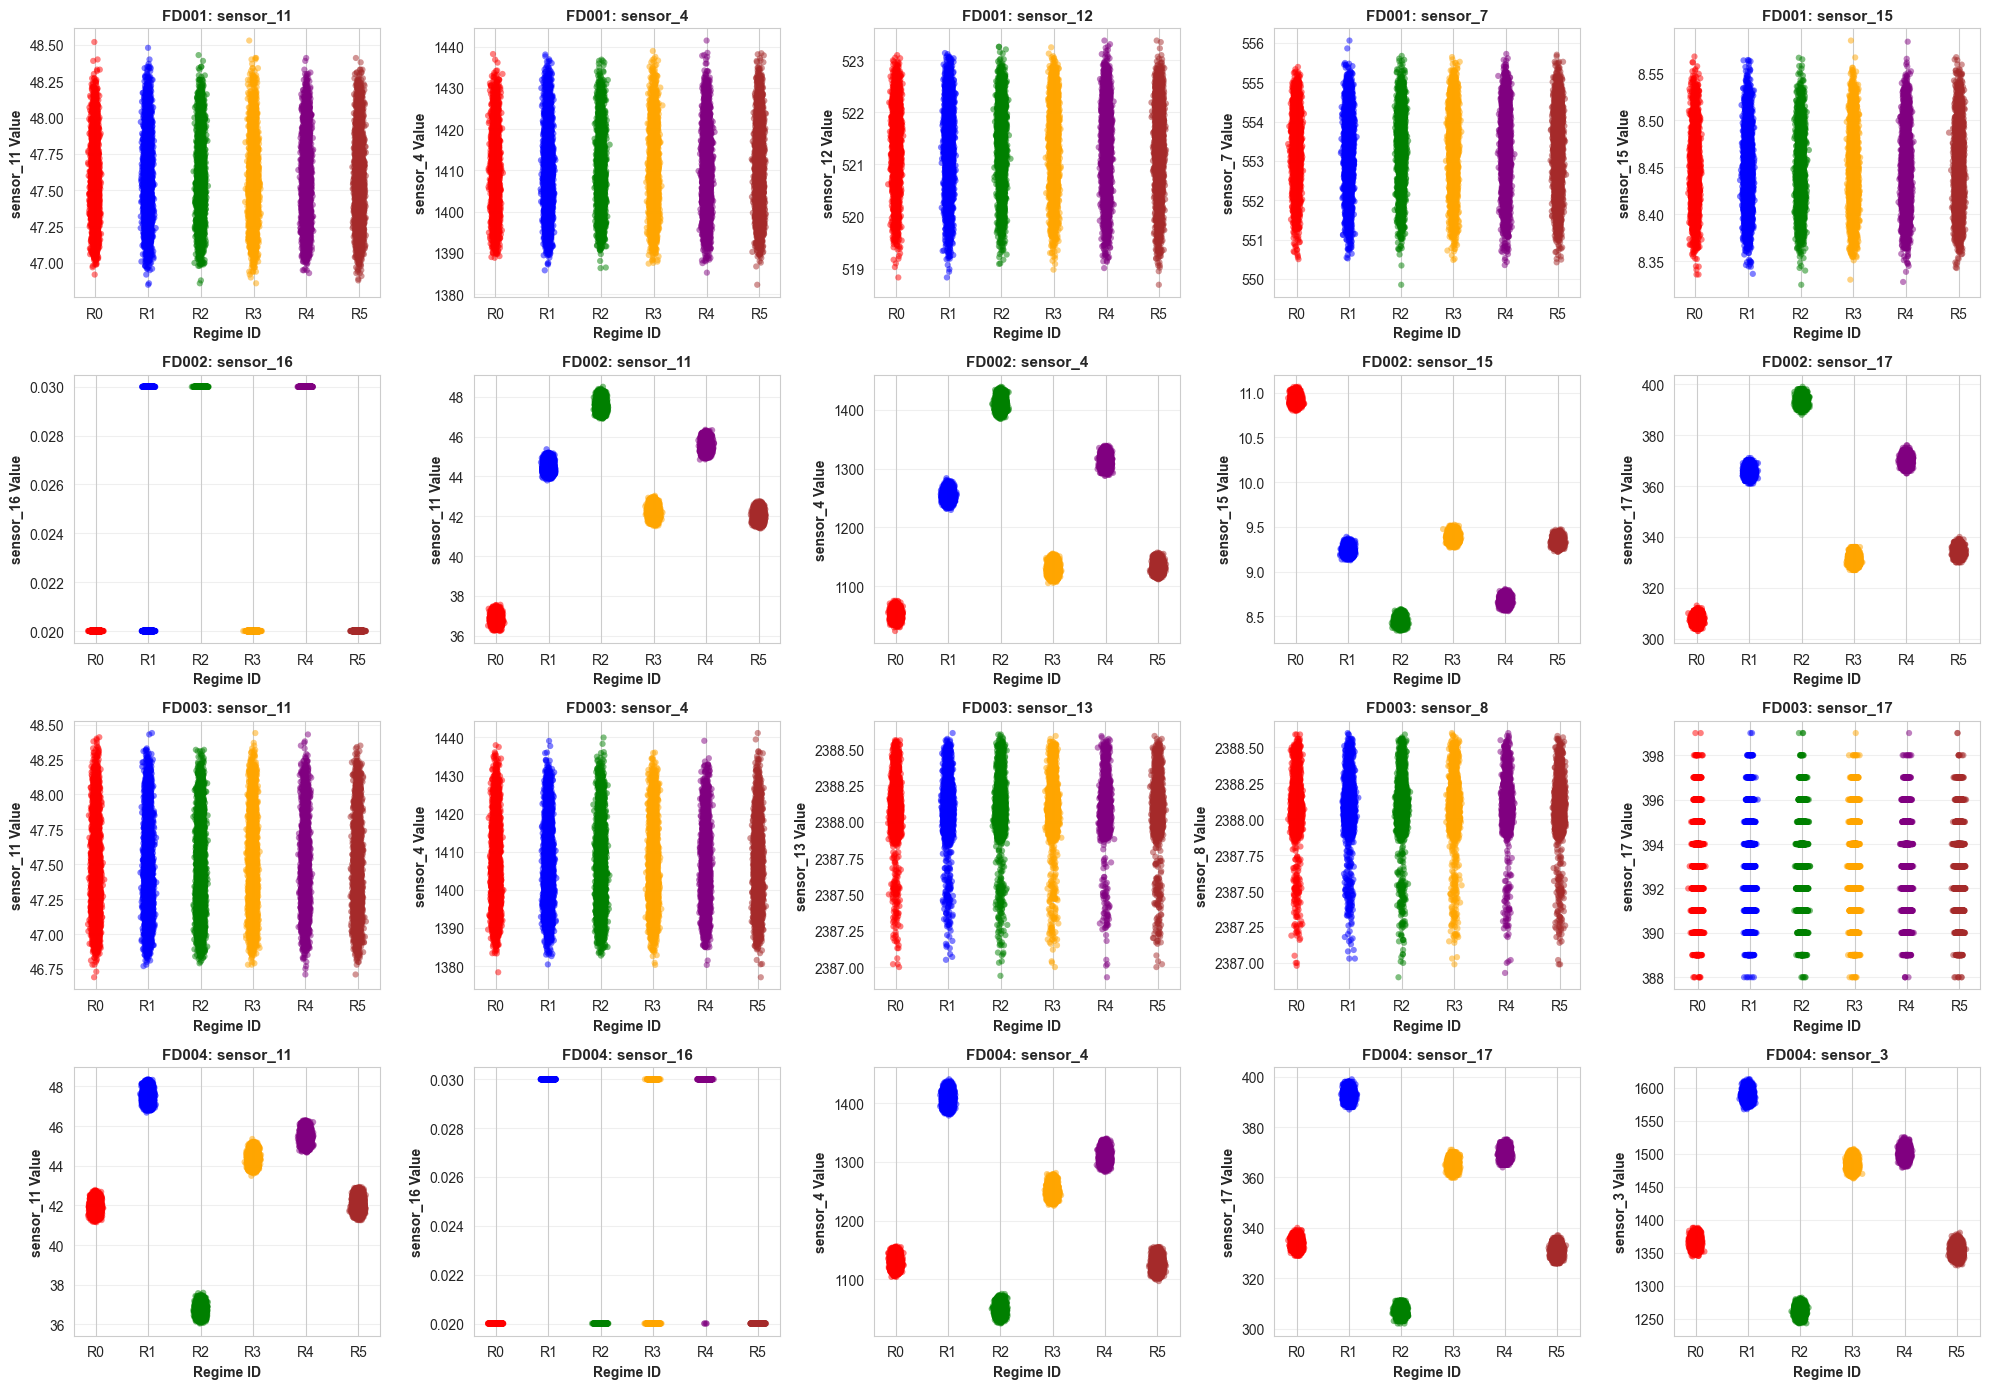


✅ Top 5 sensors vs regime clusters (scatter plot) complete


In [40]:
# ============================================================================
# SECTION 9F: TOP 5 SENSORS vs REGIME CLUSTERS (Scatter Plot)
# ============================================================================
# Purpose: Show individual sensor values for each regime as scatter points
# X-axis: Regime clusters (0-5)
# Y-axis: Sensor values

fig, axes = plt.subplots(4, 5, figsize=(20, 14))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for row_idx, dataset in enumerate(['FD001', 'FD002', 'FD003', 'FD004']):
    df = train_dfs[dataset]
    
    # Get top 5 sensors by RUL correlation
    sensor_cols = [col for col in df.columns if col.startswith('sensor_')]
    top_5_sensors = df[sensor_cols].corrwith(df['RUL']).abs().nlargest(5).index.tolist()
    
    print(f"\n{dataset} - Top 5 sensors by RUL correlation:")
    print(df[sensor_cols].corrwith(df['RUL']).abs().nlargest(5).to_string())
    
    for col_idx, sensor in enumerate(top_5_sensors):
        ax = axes[row_idx, col_idx]
        
        # Plot scatter for each regime
        for regime in range(6):
            regime_data = df[df['regime_id'] == regime]
            
            if len(regime_data) > 0:
                # Add jitter to x-axis so points don't overlap
                x_jitter = np.random.normal(regime, 0.04, len(regime_data))
                
                ax.scatter(x_jitter, regime_data[sensor].values,
                          c=colors[regime], s=20, alpha=0.5, edgecolors='none')
        
        ax.set_xlabel('Regime ID', fontsize=10, fontweight='bold')
        ax.set_ylabel(f'{sensor} Value', fontsize=10, fontweight='bold')
        ax.set_title(f'{dataset}: {sensor}', fontsize=11, fontweight='bold')
        ax.set_xticks(range(6))
        ax.set_xticklabels(['R0', 'R1', 'R2', 'R3', 'R4', 'R5'])
        ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Top 5 sensors vs regime clusters (scatter plot) complete")

In [41]:
# ============================================================================
# VERIFY REGIME CLUSTERS ASSIGNED TO ALL DATASETS
# ============================================================================

print("="*80)
print("REGIME CLUSTER ASSIGNMENT STATUS")
print("="*80)

# Check train data
print("\n✅ TRAINING DATA:")
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    df = train_dfs[dataset]
    if 'regime_id' in df.columns:
        print(f"  {dataset}: ✅ regime_id present")
        print(f"     Unique regimes: {df['regime_id'].nunique()}")
        print(f"     Shape: {df.shape}")
    else:
        print(f"  {dataset}: ❌ regime_id NOT present")

# Check test data
print("\n❌ TEST DATA:")
for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    df = test_dfs[dataset]
    if 'regime_id' in df.columns:
        print(f"  {dataset}: ✅ regime_id present")
    else:
        print(f"  {dataset}: ❌ regime_id NOT present - NEEDS TO BE ADDED")
        print(f"     Shape: {df.shape}")

print("\n" + "="*80)

REGIME CLUSTER ASSIGNMENT STATUS

✅ TRAINING DATA:
  FD001: ✅ regime_id present
     Unique regimes: 6
     Shape: (20631, 22)
  FD002: ✅ regime_id present
     Unique regimes: 6
     Shape: (53759, 25)
  FD003: ✅ regime_id present
     Unique regimes: 6
     Shape: (24720, 22)
  FD004: ✅ regime_id present
     Unique regimes: 6
     Shape: (61249, 20)

❌ TEST DATA:
  FD001: ❌ regime_id NOT present - NEEDS TO BE ADDED
     Shape: (13096, 19)
  FD002: ❌ regime_id NOT present - NEEDS TO BE ADDED
     Shape: (33991, 22)
  FD003: ❌ regime_id NOT present - NEEDS TO BE ADDED
     Shape: (16596, 19)
  FD004: ❌ regime_id NOT present - NEEDS TO BE ADDED
     Shape: (41214, 17)



In [42]:
# ============================================================================
# ASSIGN REGIME CLUSTERS TO TEST DATA (Using trained K-Means)
# ============================================================================

from sklearn.preprocessing import StandardScaler

print("="*80)
print("ASSIGNING REGIME CLUSTERS TO TEST DATA")
print("="*80)

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    test_df = test_dfs[dataset].copy()
    
    # Get the trained K-Means model for this dataset
    kmeans = regime_assignments[dataset]
    
    # Extract operating settings from test data
    op_settings_test = test_df[['op_setting_1', 'op_setting_2', 'op_setting_3']].values
    
    # Get the scaler used during training (need to recreate it)
    # Scale test data using same approach as training
    scaler_test = StandardScaler()
    train_df = train_dfs[dataset]
    op_settings_train = train_df[['op_setting_1', 'op_setting_2', 'op_setting_3']].values
    scaler_test.fit(op_settings_train)  # Fit on TRAINING data
    op_settings_test_scaled = scaler_test.transform(op_settings_test)
    
    # Apply trained K-Means to predict regime for test data
    regime_id_test = kmeans.predict(op_settings_test_scaled)
    
    # Add regime_id to test dataframe
    test_df['regime_id'] = regime_id_test
    
    # Update dictionary
    test_dfs[dataset] = test_df
    
    print(f"\n{dataset}:")
    print(f"  Test data shape: {test_df.shape}")
    print(f"  Regime distribution:")
    print(test_df['regime_id'].value_counts().sort_index().to_string())

print("\n✅ Regime clusters assigned to all test datasets")

ASSIGNING REGIME CLUSTERS TO TEST DATA

FD001:
  Test data shape: (13096, 20)
  Regime distribution:
0    1816
1    2326
2    1625
3    2455
4    2460
5    2414

FD002:
  Test data shape: (33991, 23)
  Regime distribution:
0    5042
1    5063
2    5148
3    8483
4    5107
5    5148

FD003:
  Test data shape: (16596, 20)
  Regime distribution:
0    3140
1    2985
2    3029
3    2992
4    2164
5    2286

FD004:
  Test data shape: (41214, 18)
  Regime distribution:
0     6232
1     6054
2     6107
3     6254
4     6185
5    10382

✅ Regime clusters assigned to all test datasets


In [ ]:
# ============================================================================
# STEP 1: CHECK op_setting_1 VARIANCE (ROBUST VERSION)
# ============================================================================

normalization_strategy = {}

# Use a PHYSICAL threshold. 
# 0.002 is noise. 14.0 is real flight. 
# A threshold of 1.0 safely separates them.
STD_THRESHOLD = 1.0 

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    df = train_dfs[dataset]
    
    # Calculate Standard Deviation directly
    op1_std = df['op_setting_1'].std()
    
    # Decision Logic
    if op1_std > STD_THRESHOLD:
        strategy = "REGIME-WISE NORMALIZATION"
        reason = f"High Physical Variation (Std={op1_std:.4f} > {STD_THRESHOLD})"
    else:
        strategy = "GLOBAL NORMALIZATION"
        reason = f"Steady State (Std={op1_std:.4f} <= {STD_THRESHOLD})"
    
    normalization_strategy[dataset] = {
        'strategy': strategy,
        'std': op1_std,
        'reason': reason
    }

# Summary table
print(f"\n{'Dataset':<10} {'Strategy':<30} {'Op_Setting_1 Std':<20} {'Decision':<30}")
print("-" * 90)
for ds in ['FD001', 'FD002', 'FD003', 'FD004']:
    info = normalization_strategy[ds]
    print(f"{ds:<10} {info['strategy']:<30} {info['std']:<20.4f} {info['reason']}")


Dataset    Strategy                       Op_Setting_1 Std     Decision                      
------------------------------------------------------------------------------------------
FD001      GLOBAL NORMALIZATION           0.0022               Steady State (Std=0.0022 <= 1.0)
FD002      REGIME-WISE NORMALIZATION      14.7474              High Physical Variation (Std=14.7474 > 1.0)
FD003      GLOBAL NORMALIZATION           0.0022               Steady State (Std=0.0022 <= 1.0)
FD004      REGIME-WISE NORMALIZATION      14.7807              High Physical Variation (Std=14.7807 > 1.0)


In [45]:
# ============================================================================
# STEP 2: GLOBAL Z-SCORE NORMALIZATION FOR FD001 & FD003
# ============================================================================
# Strategy: Fit scaler on TRAIN, apply to both TRAIN and TEST
# This prevents data leakage and ensures consistency

from sklearn.preprocessing import StandardScaler

print("="*80)
print("STEP 2: GLOBAL Z-SCORE NORMALIZATION (FD001 & FD003)")
print("="*80)

# Store scalers for later use (e.g., for production inference)
global_scalers = {}

epsilon = 1e-9  # Small value to prevent division by zero

for dataset in ['FD001', 'FD003']:
    print(f"\n{dataset}:")
    print("-" * 80)
    
    # Get sensor columns only
    sensor_cols = [col for col in train_dfs[dataset].columns if col.startswith('sensor_')]
    
    print(f"  Sensor columns to normalize: {len(sensor_cols)}")
    print(f"  Sensors: {sensor_cols}")
    
    # Get training data
    train_df = train_dfs[dataset].copy()
    test_df = test_dfs[dataset].copy()
    
    print(f"\n  Before normalization:")
    print(f"    Train shape: {train_df.shape}")
    print(f"    Test shape: {test_df.shape}")
    
    # ========== TRAIN SCALER ==========
    # Fit scaler on TRAINING data ONLY
    scaler = StandardScaler()
    train_sensor_values = train_df[sensor_cols].values
    
    # Fit the scaler
    scaler.fit(train_sensor_values)
    
    # Get mean and std from scaler
    means = scaler.mean_
    stds = scaler.scale_
    
    print(f"\n  Scaler statistics (from TRAINING data):")
    print(f"    Mean range: {means.min():.4f} to {means.max():.4f}")
    print(f"    Std range: {stds.min():.4f} to {stds.max():.4f}")
    
    # ========== APPLY TO TRAINING DATA ==========
    # Z-Score: (x - mean) / (std + epsilon)
    train_df_normalized = train_df.copy()
    train_df_normalized[sensor_cols] = (train_df[sensor_cols].values - means) / (stds + epsilon)
    
    print(f"\n  After normalization (TRAIN):")
    print(f"    Mean of normalized sensors: {train_df_normalized[sensor_cols].mean().mean():.6f}")
    print(f"    Std of normalized sensors: {train_df_normalized[sensor_cols].std().mean():.6f}")
    
    # ========== APPLY TO TEST DATA ==========
    # Use SAME mean and std from training data
    test_df_normalized = test_df.copy()
    test_df_normalized[sensor_cols] = (test_df[sensor_cols].values - means) / (stds + epsilon)
    
    print(f"\n  After normalization (TEST):")
    print(f"    Mean of normalized sensors: {test_df_normalized[sensor_cols].mean().mean():.6f}")
    print(f"    Std of normalized sensors: {test_df_normalized[sensor_cols].std().mean():.6f}")
    
    # ========== STORE RESULTS ==========
    train_dfs[dataset] = train_df_normalized
    test_dfs[dataset] = test_df_normalized
    global_scalers[dataset] = {
        'scaler': scaler,
        'means': means,
        'stds': stds,
        'sensor_cols': sensor_cols
    }
    
    print(f"\n  ✅ {dataset} normalization complete")
    print(f"     Scaler stored for future use")

print("\n" + "="*80)
print("✅ STEP 2 COMPLETE: Global normalization applied to FD001 & FD003")
print("="*80)

STEP 2: GLOBAL Z-SCORE NORMALIZATION (FD001 & FD003)

FD001:
--------------------------------------------------------------------------------
  Sensor columns to normalize: 14
  Sensors: ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

  Before normalization:
    Train shape: (20631, 22)
    Test shape: (13096, 20)

  Scaler statistics (from TRAINING data):
    Mean range: 8.4421 to 9065.2429
    Std range: 0.0375 to 22.0823

  After normalization (TRAIN):
    Mean of normalized sensors: 0.000000
    Std of normalized sensors: 1.000024

  After normalization (TEST):
    Mean of normalized sensors: -0.151476
    Std of normalized sensors: 0.743349

  ✅ FD001 normalization complete
     Scaler stored for future use

FD003:
--------------------------------------------------------------------------------
  Sensor columns to normalize: 14
  Sensors: ['sensor_2', '

In [46]:
# ============================================================================
# STEP 3: REGIME-WISE Z-SCORE NORMALIZATION FOR FD002 & FD004
# ============================================================================
# Strategy: Fit K-Means on TRAIN, apply to both TRAIN and TEST
# Calculate Mean/Std per regime on TRAIN, apply to both TRAIN and TEST
# This prevents data leakage and ensures consistency

print("="*80)
print("STEP 3: REGIME-WISE Z-SCORE NORMALIZATION (FD002 & FD004)")
print("="*80)

# Store regime scalers for later use
regime_scalers = {}

epsilon = 1e-9  # Small value to prevent division by zero

for dataset in ['FD002', 'FD004']:
    print(f"\n{'='*80}")
    print(f"{dataset}: REGIME-WISE NORMALIZATION")
    print(f"{'='*80}")
    
    # Get sensor columns only
    sensor_cols = [col for col in train_dfs[dataset].columns if col.startswith('sensor_')]
    
    print(f"\n  Sensor columns to normalize: {len(sensor_cols)}")
    print(f"  Sensors: {sensor_cols[:5]}... (showing first 5)")
    
    # Get training and test data
    train_df = train_dfs[dataset].copy()
    test_df = test_dfs[dataset].copy()
    
    print(f"\n  Data shape:")
    print(f"    Train: {train_df.shape}")
    print(f"    Test: {test_df.shape}")
    
    # ========== STEP 3A: K-MEANS CLUSTERING ==========
    print(f"\n  Step 3A: K-Means Clustering (K=6)")
    print(f"  " + "-"*76)
    
    # Use the regime_id that was already assigned in earlier steps
    # (Already have regime_id from Section 9 K-Means clustering)
    
    # Verify regime_id exists and has 6 clusters
    if 'regime_id' not in train_df.columns:
        print("  ❌ ERROR: regime_id not found in train data")
    else:
        train_regimes = train_df['regime_id'].nunique()
        test_regimes = test_df['regime_id'].nunique()
        print(f"    ✅ regime_id already assigned")
        print(f"    Train regimes: {train_regimes}")
        print(f"    Test regimes: {test_regimes}")
    
    # ========== STEP 3B: CALCULATE REGIME STATISTICS (from TRAINING DATA ONLY) ==========
    print(f"\n  Step 3B: Calculate Mean & Std per Regime (using TRAINING data)")
    print(f"  " + "-"*76)
    
    # Dictionary to store per-regime statistics
    regime_stats = {}
    
    for regime_id in range(6):
        # Filter to this regime in TRAINING data
        regime_train = train_df[train_df['regime_id'] == regime_id]
        
        if len(regime_train) > 0:
            # Calculate mean and std for each sensor in this regime
            regime_means = regime_train[sensor_cols].mean().values
            regime_stds = regime_train[sensor_cols].std().values
            
            regime_stats[regime_id] = {
                'means': regime_means,
                'stds': regime_stds,
                'count': len(regime_train)
            }
            
            print(f"\n    Regime {regime_id}:")
            print(f"      Data points: {len(regime_train)}")
            print(f"      Unique engines: {regime_train['unit_id'].nunique()}")
            print(f"      Mean of sensor means: {regime_means.mean():.4f}")
            print(f"      Mean of sensor stds: {regime_stds.mean():.4f}")
        else:
            print(f"\n    Regime {regime_id}: ⚠️ No data in training set")
    
    # ========== STEP 3C: VERIFY REGIME STATISTICS ARE DISTINCT ==========
    print(f"\n  Step 3C: Verify Regime Statistics Are Distinct")
    print(f"  " + "-"*76)
    print(f"\n    Sensor Means by Regime (first 3 sensors shown):")
    print(f"\n    {'Regime':<8} {sensor_cols[0]:<12} {sensor_cols[1]:<12} {sensor_cols[2]:<12}")
    print(f"    {'-'*50}")
    
    for regime_id in range(6):
        if regime_id in regime_stats:
            means = regime_stats[regime_id]['means']
            print(f"    {regime_id:<8} {means[0]:<12.4f} {means[1]:<12.4f} {means[2]:<12.4f}")
    
    # ========== STEP 3D: APPLY NORMALIZATION TO TRAINING DATA ==========
    print(f"\n  Step 3D: Apply Normalization to TRAINING Data")
    print(f"  " + "-"*76)
    
    train_df_normalized = train_df.copy()
    
    for regime_id in range(6):
        if regime_id in regime_stats:
            # Find all rows in training data with this regime
            mask = train_df['regime_id'] == regime_id
            
            # Get the means and stds for this regime
            regime_means = regime_stats[regime_id]['means']
            regime_stds = regime_stats[regime_id]['stds']
            
            # Apply Z-score normalization: (x - mean) / (std + epsilon)
            train_df_normalized.loc[mask, sensor_cols] = (
                train_df.loc[mask, sensor_cols].values - regime_means
            ) / (regime_stds + epsilon)
    
    print(f"    ✅ Training data normalized")
    print(f"    Mean of all normalized sensors: {train_df_normalized[sensor_cols].mean().mean():.6f}")
    print(f"    Std of all normalized sensors: {train_df_normalized[sensor_cols].std().mean():.6f}")
    
    # ========== STEP 3E: APPLY NORMALIZATION TO TEST DATA ==========
    print(f"\n  Step 3E: Apply Normalization to TEST Data")
    print(f"  " + "-"*76)
    
    test_df_normalized = test_df.copy()
    
    for regime_id in range(6):
        if regime_id in regime_stats:
            # Find all rows in test data with this regime
            mask = test_df['regime_id'] == regime_id
            
            # Get the means and stds for this regime (from TRAINING stats)
            regime_means = regime_stats[regime_id]['means']
            regime_stds = regime_stats[regime_id]['stds']
            
            # Apply Z-score normalization: (x - mean) / (std + epsilon)
            test_df_normalized.loc[mask, sensor_cols] = (
                test_df.loc[mask, sensor_cols].values - regime_means
            ) / (regime_stds + epsilon)
    
    print(f"    ✅ Test data normalized")
    print(f"    Mean of all normalized sensors: {test_df_normalized[sensor_cols].mean().mean():.6f}")
    print(f"    Std of all normalized sensors: {test_df_normalized[sensor_cols].std().mean():.6f}")
    
    # ========== STORE RESULTS ==========
    train_dfs[dataset] = train_df_normalized
    test_dfs[dataset] = test_df_normalized
    regime_scalers[dataset] = {
        'regime_stats': regime_stats,
        'sensor_cols': sensor_cols
    }
    
    print(f"\n  ✅ {dataset} regime-wise normalization complete")
    print(f"     Regime statistics stored for future use")

print("\n" + "="*80)
print("✅ STEP 3 COMPLETE: Regime-wise normalization applied to FD002 & FD004")
print("="*80)

STEP 3: REGIME-WISE Z-SCORE NORMALIZATION (FD002 & FD004)

FD002: REGIME-WISE NORMALIZATION

  Sensor columns to normalize: 17
  Sensors: ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8']... (showing first 5)

  Data shape:
    Train: (53759, 25)
    Test: (33991, 23)

  Step 3A: K-Means Clustering (K=6)
  ----------------------------------------------------------------------------
    ✅ regime_id already assigned
    Train regimes: 6
    Test regimes: 6

  Step 3B: Calculate Mean & Std per Regime (using TRAINING data)
  ----------------------------------------------------------------------------

    Regime 0:
      Data points: 8002
      Unique engines: 260
      Mean of sensor means: 1031.0513
      Mean of sensor stds: 1.7413

    Regime 1:
      Data points: 8122
      Unique engines: 260
      Mean of sensor means: 1195.3457
      Mean of sensor stds: 2.0339

    Regime 2:
      Data points: 8044
      Unique engines: 260
      Mean of sensor means: 1268.0224
      Me

In [47]:
# ============================================================================
# SAVE NORMALIZED DATASETS TO data/normalised-clean-data
# ============================================================================

import os

NORMALIZED_DIR = "data/normalised-clean-data"
os.makedirs(NORMALIZED_DIR, exist_ok=True)

print("="*80)
print("SAVING NORMALIZED DATASETS")
print("="*80)

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    print(f"\n{dataset}:")
    print("-" * 80)
    
    # Get train and test data
    train_df = train_dfs[dataset]
    test_df = test_dfs[dataset]
    
    # Save train data
    train_output_path = os.path.join(NORMALIZED_DIR, f'train_{dataset}_normalized.csv')
    train_df.to_csv(train_output_path, index=False)
    print(f"  ✅ Saved: train_{dataset}_normalized.csv")
    print(f"     Shape: {train_df.shape}")
    print(f"     Columns: {list(train_df.columns)}")
    
    # Save test data
    test_output_path = os.path.join(NORMALIZED_DIR, f'test_{dataset}_normalized.csv')
    test_df.to_csv(test_output_path, index=False)
    print(f"\n  ✅ Saved: test_{dataset}_normalized.csv")
    print(f"     Shape: {test_df.shape}")
    print(f"     Columns: {list(test_df.columns)}")

print("\n" + "="*80)
print("VERIFY SAVED FILES")
print("="*80)

saved_files = sorted([f for f in os.listdir(NORMALIZED_DIR)])
print(f"\n📁 Total files saved: {len(saved_files)}")
print(f"   Location: {NORMALIZED_DIR}\n")

for file in saved_files:
    file_path = os.path.join(NORMALIZED_DIR, file)
    file_size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
    print(f"  ✅ {file:<40} ({file_size:.2f} MB)")

print("\n" + "="*80)
print("✅ ALL NORMALIZED DATASETS SAVED SUCCESSFULLY")
print("="*80)

SAVING NORMALIZED DATASETS

FD001:
--------------------------------------------------------------------------------
  ✅ Saved: train_FD001_normalized.csv
     Shape: (20631, 22)
     Columns: ['unit_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21', 'RUL', 'regime', 'regime_id']

  ✅ Saved: test_FD001_normalized.csv
     Shape: (13096, 20)
     Columns: ['unit_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21', 'regime_id']

FD002:
--------------------------------------------------------------------------------
  ✅ Saved: train_FD002_normalized.csv
     Shape: (53759, 25)
     Columns: ['unit_id', 'time', 'op_setting_1', 

In [49]:
pd.read_csv("data/normalised-clean-data/train_FD002_normalized.csv").head(20)

unit_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_2  \
0         1     1       34.9983        0.8400         100.0 -1.090273   
1         1     2       41.9982        0.8408         100.0  0.450777   
2         1     3       24.9988        0.6218          60.0  1.242381   
3         1     4       42.0077        0.8416         100.0 -0.450228   
4         1     5       25.0005        0.6203          60.0  0.572229   
5         1     6       25.0045        0.6205          60.0  0.432614   
6         1     7       42.0043        0.8409         100.0  0.081134   
7         1     8       20.0020        0.7002         100.0 -0.269595   
8         1     9       41.9995        0.8407         100.0 -0.866076   
9         1    10       42.0011        0.8400         100.0 -0.866076   
10        1    11       42.0029        0.8400         100.0  0.242853   
11        1    12        0.0015        0.0010         100.0  0.042910   
12        1    13       20.0003        0.7000         100.0  0.227051   
13        1    14       42.0020        0.8407         100.0 -0.542639   
14        1    15       10.0038        0.2513         100.0 -0.723669   
15        1    16       35.0053        0.8419         100.0 -0.544184   
16        1    17       25.0077        0.6217          60.0 -1.717455   
17        1    18       34.9996        0.8404         100.0 -0.794475   
18        1    19       42.0018        0.8400         100.0 -1.466746   
19        1    20       20.0020        0.7015         100.0  0.723698   

    sensor_3  sensor_4  sensor_7  sensor_8  ...  sensor_15     sensor_16  \
0  -1.442990  0.769983  0.412668 -1.400728  ...   0.361665  3.469447e-09   
1  -0.220650 -0.264827 -0.274140 -1.339706  ...   0.062509  3.469447e-09   
2  -1.122003 -0.421643  0.634410 -1.165778  ...  -0.459691  0.000000e+00   
3  -0.076868 -0.186263 -0.388003 -1.306342  ...  -0.593207  3.469447e-09   
4  -0.942097 -0.351147 -0.839675 -1.203904  ...  -0.408778  0.000000e+00   
5   0.699779 -0.235122 -0.571660 -1.013275  ...  -0.526804  0.000000e+00   
6  -1.244880 -0.080201  0.181311 -1.172888  ...   0.006533  3.469447e-09   
7  -0.673939 -0.097321 -0.143082 -1.197050  ...   0.108078 -5.221189e-01   
8  -1.106423 -0.046156 -1.298905 -1.206251  ...   0.339722  3.469447e-09   
9   0.343830 -0.090676  0.158538 -1.373069  ...   0.550297  3.469447e-09   
10 -0.309405 -0.205904 -1.868219 -1.272978  ...   0.321063  3.469447e-09   
11 -0.813824 -0.697227  0.655841  0.275445  ...  -1.436124 -1.387779e-08   
12  0.545102  0.382552  1.375001 -1.197050  ...  -0.921197 -5.221189e-01   
13 -0.314730 -0.864537 -0.069187 -1.272978  ...   0.411691  3.469447e-09   
14 -0.050441 -0.624669  1.318183 -0.935837  ...  -1.485561 -1.387779e-08   
15 -0.766312 -0.618870 -0.007151 -1.006274  ...  -0.238421  3.469447e-09   
16 -0.495174  0.393467 -0.482321 -1.127652  ...  -1.211819  0.000000e+00   
17 -0.278391  0.552468 -1.413545 -1.221430  ...   0.251606  3.469447e-09   
18 -0.886311  0.918879  0.204083 -1.272978  ...   0.126481  3.469447e-09   
19 -0.544253  0.337644 -0.110080 -0.643227  ...   0.760038 -5.221189e-01   

    sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  RUL  \
0   -0.167394        0.0   0.000000  -0.890351  -1.352264  148   
1   -0.757070        0.0   0.000000  -1.634704  -1.315545  147   
2    1.277735        0.0  -0.000014  -1.631271   1.720355  146   
3   -1.466932        0.0   0.000000   0.033179   1.845307  145   
4    1.277735        0.0  -0.000014  -1.185177  -0.451128  144   
5   -1.042836        0.0  -0.000014   0.153106   0.008253  143   
6   -0.757070        0.0   0.000000   0.311160   1.109431  142   
7   -0.262234        0.0   0.000000  -0.919516   1.581127  141   
8   -0.047208        0.0   0.000000   0.959781   0.449626  140   
9   -1.466932        0.0   0.000000  -0.152141  -1.032993  139   
10  -0.047208        0.0   0.000000  -0.708102  -0.183786  138   
11  -0.130497        0.0   0.000000   1.253397  -0.195634  137   
12  -0.262234  

### Visualizinf the normalised dataset:

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
 
print(" Plot over normalised CSV - train")
# 1. Setup Directories
INPUT_DIR = "data/normalised-clean-data"
PLOTS_DIR = "feature_plots/Normalized"
os.makedirs(PLOTS_DIR, exist_ok=True)

# 2. Style Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 14)
plt.rcParams['font.size'] = 10

print(f"✅ Reading data from: {INPUT_DIR}")
print(f"✅ Saving plots to: {PLOTS_DIR}\n")

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    print(f"📊 Processing {dataset}...")
    
    # 3. Load the Normalized Data
    file_path = os.path.join(INPUT_DIR, f"train_{dataset}_normalized.csv")
    if not os.path.exists(file_path):
        print(f"   ⚠️ File not found: {file_path}")
        continue
        
    df = pd.read_csv(file_path)
    
    # ⚠️ Compatibility Fix: Ensure we have a 'time' column for plotting
    if 'cycle' in df.columns:
        df['time'] = df['cycle']
    
    # 4. Select a Sample Engine (First Unit ID)
    sample_engine_id = df['unit_id'].min()
    sample_engine = df[df['unit_id'] == sample_engine_id].sort_values('time').reset_index(drop=True)
    
    # Get sensor columns (excluding non-sensor cols)
    sensor_cols = [c for c in df.columns if 'sensor_' in c and 'norm' not in c] # Adjust if names changed
    # If standard names were used in-place:
    if not sensor_cols:
        sensor_cols = [c for c in df.columns if c.startswith('sensor_')]

    # 5. Plotting Grid
    num_sensors = len(sensor_cols)
    rows = (num_sensors // 3) + (1 if num_sensors % 3 != 0 else 0)
    fig, axes = plt.subplots(rows, 3, figsize=(20, 4*rows))
    axes = axes.flatten()
    
    # Degradation Marker (80% of life)
    degradation_start = sample_engine['time'].max() * 0.8
    
    for idx, sensor in enumerate(sensor_cols):
        ax = axes[idx]
        
        # --- PRO TIP: Regime Background for FD002/FD004 ---
        # This highlights that the sensor is stable DESPITE regime changes
        if dataset in ['FD002', 'FD004'] and 'regime_id' in sample_engine.columns:
            # Create a colored background based on regime_id
            regimes = sample_engine['regime_id'].values
            # Normalize regimes to 0-1 for colormap
            extent = [sample_engine['time'].min(), sample_engine['time'].max(), 
                     sample_engine[sensor].min(), sample_engine[sensor].max()]
            
            # We plot distinct colored bars for each time step's regime
            # (Simplified: using a scatter or pcolormesh is better for speed, 
            # but here we just use vertical spans for distinct blocks if needed)
            # For speed in matplotlib, we'll just plot the line, but if you want 
            # to see regimes, uncomment the scatter below:
            # ax.scatter(sample_engine['time'], sample_engine[sensor], 
            #            c=sample_engine['regime_id'], cmap='Pastel1', alpha=0.5, s=10)
            pass

        # Plot the Sensor Trajectory
        ax.plot(sample_engine['time'], sample_engine[sensor], 
                color='darkblue', linewidth=2, label='Normalized Signal')
        
        # Plot Degradation Zone
        ax.axvline(degradation_start, color='red', linestyle='--', alpha=0.7)
        ax.axvspan(degradation_start, sample_engine['time'].max(), color='red', alpha=0.1)
        
        # Formatting
        ax.set_title(f'{sensor}_{dataset} (Normalized)', fontsize=10, fontweight='bold')
        ax.set_xlabel('Cycle')
        ax.grid(True, alpha=0.3)
        
        # Consistent Y-Axis for Normalized Data (expecting -3 to 3 mostly)
        # This helps you spot outliers instantly
        ax.set_ylim(sample_engine[sensor].min()-0.5, sample_engine[sensor].max()+0.5)

    # Hide unused subplots
    for idx in range(num_sensors, len(axes)):
        axes[idx].set_visible(False)
        
    plt.suptitle(f'{dataset} Normalized: Engine {sample_engine_id}', fontsize=16, y=0.99)
    plt.tight_layout()
    
    # Save
    save_path = os.path.join(PLOTS_DIR, f"train_{dataset}_normalized_trajectory.png")
    plt.savefig(save_path, dpi=100)
    print(f"   ✅ Saved plot to: {save_path}")
    plt.close()

print("\n🚀 Visualization Complete!")

 Plot over normalised CSV - train
✅ Reading data from: data/normalised-clean-data
✅ Saving plots to: feature_plots/Normalized

📊 Processing FD001...
   ✅ Saved plot to: feature_plots/Normalized\train_FD001_normalized_trajectory.png
📊 Processing FD002...
   ✅ Saved plot to: feature_plots/Normalized\train_FD002_normalized_trajectory.png
📊 Processing FD003...
   ✅ Saved plot to: feature_plots/Normalized\train_FD003_normalized_trajectory.png
📊 Processing FD004...
   ✅ Saved plot to: feature_plots/Normalized\train_FD004_normalized_trajectory.png

🚀 Visualization Complete!


In [63]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
print(" Plot over normalised CSV - test ")

# 1. Setup Directories
INPUT_DIR = "data/normalised-clean-data"
PLOTS_DIR = "feature_plots/Normalized"
os.makedirs(PLOTS_DIR, exist_ok=True)

# 2. Style Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 14)
plt.rcParams['font.size'] = 10

print(f"✅ Reading data from: {INPUT_DIR}")
print(f"✅ Saving plots to: {PLOTS_DIR}\n")

for dataset in ['FD001', 'FD002', 'FD003', 'FD004']:
    print(f"📊 Processing {dataset}...")
    
    # 3. Load the Normalized Data
    file_path = os.path.join(INPUT_DIR, f"test_{dataset}_normalized.csv")
    if not os.path.exists(file_path):
        print(f"   ⚠️ File not found: {file_path}")
        continue
        
    df = pd.read_csv(file_path)
    
    # ⚠️ Compatibility Fix: Ensure we have a 'time' column for plotting
    if 'cycle' in df.columns:
        df['time'] = df['cycle']
    
    # 4. Select a Sample Engine (First Unit ID)
    sample_engine_id = df['unit_id'].min()
    sample_engine = df[df['unit_id'] == sample_engine_id].sort_values('time').reset_index(drop=True)
    
    # Get sensor columns (excluding non-sensor cols)
    sensor_cols = [c for c in df.columns if 'sensor_' in c and 'norm' not in c] # Adjust if names changed
    # If standard names were used in-place:
    if not sensor_cols:
        sensor_cols = [c for c in df.columns if c.startswith('sensor_')]

    # 5. Plotting Grid
    num_sensors = len(sensor_cols)
    rows = (num_sensors // 3) + (1 if num_sensors % 3 != 0 else 0)
    fig, axes = plt.subplots(rows, 3, figsize=(20, 4*rows))
    axes = axes.flatten()
    
    # Degradation Marker (80% of life)
    degradation_start = sample_engine['time'].max() * 0.8
    
    for idx, sensor in enumerate(sensor_cols):
        ax = axes[idx]
        
        # --- PRO TIP: Regime Background for FD002/FD004 ---
        # This highlights that the sensor is stable DESPITE regime changes
        if dataset in ['FD002', 'FD004'] and 'regime_id' in sample_engine.columns:
            # Create a colored background based on regime_id
            regimes = sample_engine['regime_id'].values
            # Normalize regimes to 0-1 for colormap
            extent = [sample_engine['time'].min(), sample_engine['time'].max(), 
                     sample_engine[sensor].min(), sample_engine[sensor].max()]
            
            # We plot distinct colored bars for each time step's regime
            # (Simplified: using a scatter or pcolormesh is better for speed, 
            # but here we just use vertical spans for distinct blocks if needed)
            # For speed in matplotlib, we'll just plot the line, but if you want 
            # to see regimes, uncomment the scatter below:
            # ax.scatter(sample_engine['time'], sample_engine[sensor], 
            #            c=sample_engine['regime_id'], cmap='Pastel1', alpha=0.5, s=10)
            pass

        # Plot the Sensor Trajectory
        ax.plot(sample_engine['time'], sample_engine[sensor], 
                color='darkblue', linewidth=2, label='Normalized Signal')
        
        # Plot Degradation Zone
        ax.axvline(degradation_start, color='red', linestyle='--', alpha=0.7)
        ax.axvspan(degradation_start, sample_engine['time'].max(), color='red', alpha=0.1)
        
        # Formatting
        ax.set_title(f'{sensor}_{dataset} (Normalized)', fontsize=10, fontweight='bold')
        ax.set_xlabel('Cycle')
        ax.grid(True, alpha=0.3)
        
        # Consistent Y-Axis for Normalized Data (expecting -3 to 3 mostly)
        # This helps you spot outliers instantly
        ax.set_ylim(sample_engine[sensor].min()-0.5, sample_engine[sensor].max()+0.5)

    # Hide unused subplots
    for idx in range(num_sensors, len(axes)):
        axes[idx].set_visible(False)
        
    plt.suptitle(f'{dataset} Normalized: Engine {sample_engine_id}', fontsize=16, y=0.99)
    plt.tight_layout()
    
    # Save
    save_path = os.path.join(PLOTS_DIR, f"test_{dataset}_normalized_trajectory.png")
    plt.savefig(save_path, dpi=100)
    print(f"   ✅ Saved plot to: {save_path}")
    plt.close()

print("\n🚀 Visualization Complete!")

 Plot over normalised CSV - test 
✅ Reading data from: data/normalised-clean-data
✅ Saving plots to: feature_plots/Normalized

📊 Processing FD001...
   ✅ Saved plot to: feature_plots/Normalized\test_FD001_normalized_trajectory.png
📊 Processing FD002...
   ✅ Saved plot to: feature_plots/Normalized\test_FD002_normalized_trajectory.png
📊 Processing FD003...
   ✅ Saved plot to: feature_plots/Normalized\test_FD003_normalized_trajectory.png
📊 Processing FD004...
   ✅ Saved plot to: feature_plots/Normalized\test_FD004_normalized_trajectory.png

🚀 Visualization Complete!


In [ ]:
# # dropped some const columns after Normalisation

# import pandas as pd
# for ds, cols in {"FD002": ["sensor_18", "sensor_19"], "FD004": ["sensor_18"]}.items():
#     for mode in ["train", "test"]:
#         path = f"data/normalised-clean-data/{mode}_{ds}_normalized.csv"
#         pd.read_csv(path).drop(columns=cols, errors='ignore').to_csv(path, index=False)